In [ ]:
! pip install ONE-api
! pip install ibllib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.4/292.4 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 17.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━

In [ ]:
!git clone -b imbizo https://github.com/int-brain-lab/paper-brain-wide-map.git
%cd /content/paper-brain-wide-map
!pip install -e

Cloning into 'paper-brain-wide-map'...
remote: Enumerating objects: 1992, done.
remote: Counting objects: 100% (1099/1099), done.
remote: Compressing objects: 100% (405/405), done.
remote: Total 1992 (delta 826), reused 878 (delta 691), pack-reused 893
Receiving objects: 100% (1992/1992), 4.99 MiB | 10.98 MiB/s, done.
Resolving deltas: 100% (1261/1261), done.
/content/paper-brain-wide-map

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-e option requires 1 argument


In [ ]:

# Instanciate the ONE cache
from pathlib import Path
ibl_cache = Path.home() / 'Downloads' / 'IBL_Cache'
ibl_cache.mkdir(exist_ok=True, parents=True)

# Setup the ONE API
from one.api import ONE
ONE.setup()

Param ALYX_URL, current value is ["https://openalyx.internationalbrainlab.org"]:
Param ALYX_LOGIN, current value is ["intbrainlab"]:
Param HTTP_DATA_SERVER, current value is ["https://ibl.flatironinstitute.org/public"]:
Param HTTP_DATA_SERVER_LOGIN, current value is ["None"]:
Enter the FlatIron HTTP password for None (leave empty to keep current): ··········
Enter the location of the download cache, current value is ["/root/Downloads/ONE/openalyx.internationalbrainlab.org"]:
Would you like to set this URL as the default one? [Y/n]
Are the above settings correct? [Y/n]
ONE Parameter files location: /root/.one


IBLParams(CLIENT_MAP={'openalyx.internationalbrainlab.org': '/root/Downloads/ONE/openalyx.internationalbrainlab.org'}, DEFAULT='openalyx.internationalbrainlab.org')

In [ ]:
from one.api import ONE
from brainbox.population.decode import get_spike_counts_in_bins
from brainbox.io.one import SpikeSortingLoader, SessionLoader
from brainbox.ephys_plots import plot_brain_regions
from brainbox.behavior.wheel import velocity
from brainbox.task.trials import get_event_aligned_raster, get_psth
from ibllib.atlas import AllenAtlas
from brainwidemap import bwm_query
from brainwidemap.imbizo.encoding_functions import get_choice_time_shuffle
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

one = ONE(base_url='https://openalyx.internationalbrainlab.org', \
          password='international', silent=True, cache_dir=ibl_cache)

ba = AllenAtlas()

/usr/local/lib/python3.10/dist-packages/ibllib/atlas/__init__.py:205: DeprecationWarning: ibllib.atlas is deprecated. Please install iblatlas using "pip install iblatlas" and use this module instead
  warnings.warn('ibllib.atlas is deprecated. Please install iblatlas using "pip install iblatlas" and use '
/usr/local/lib/python3.10/dist-packages/ibllib/atlas/atlas.py:13: DeprecationWarning: ibllib.atlas.atlas.AllenAtlas is deprecated. Use iblatlas.atlas.AllenAtlas instead
  warnings.warn(warning_text, DeprecationWarning)


Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/histology/ATLAS/Needles/Allen/average_template_25.nrrd Bytes: 32998960


100%|██████████| 31.470260620117188/31.470260620117188 [00:00<00:00, 55.72it/s]


Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/histology/ATLAS/Needles/Allen/annotation_25.nrrd Bytes: 4035363


100%|██████████| 3.848422050476074/3.848422050476074 [00:00<00:00, 17.70it/s]


In [ ]:
import pandas as pd

Place to search for region acronym https://search.brain-map.org/search/index.html?query=posterior%20parietal%20cortex&fa=false&e_sp=t&e_ag=t&e_tr=t&e_fa=t

In [ ]:
acronym = 'STR'
insertions = one.search_insertions(atlas_acronym=acronym, query_type='remote')

In [ ]:
#to do, cannot find PPC, Center2, center3?
acronym_2 = 'CENT2' #PoPC
insertions_2 = one.search_insertions(atlas_acronym=acronym_2, query_type='remote')

In [ ]:
acronym_2 = 'PoPC' #PoPC #from the same animal
insertions_2 = one.search_insertions(atlas_acronym=acronym_2, query_type='remote')

In [ ]:
len(insertions_2)

0

In [ ]:
#OFC orbitofrontal cortex
acronym_3 = 'HIP'
insertions_3 = one.search_insertions(atlas_acronym=acronym_3, query_type='remote')

In [ ]:
#prefrontal cortex FRP FRP1 FRP2/3
acronym_4 = 'FRP'
insertions_4 = one.search_insertions(atlas_acronym=acronym_4, query_type='remote')

In [ ]:
len(insertions_4)

11

In [ ]:
insertions_3[0]

'd591a59c-b49b-46ba-a914-df379ada9813'

In [ ]:
insertions_2[0]

'a759e857-fd8f-4653-a397-c48547230427'

In [ ]:
#sessions = one.search(atlas_acronym=acronym, query_type='remote')

In [ ]:
#len(sessions)

154

In [ ]:
# one = ONE()
# eid = 'f4eb56a4-8bf8-4bbc-a8f3-6e6535134bad'
# trials = one.load_object(eid, 'trials', collection='alf')

In [ ]:
# trials.to_df()

goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0            101.055802     102.437889   101.056593      101.373102    -1.0   
1            104.871307     106.221143   104.872178      105.150709    -1.0   
2            108.888023     110.471118   108.888777      109.403725    -1.0   
3            113.804633     115.121053   113.805352      114.048533     1.0   
4            118.454620     119.720960   118.455587      118.658219     1.0   
..                  ...            ...          ...             ...     ...   
553         3425.311001    3428.227476  3425.312235     3426.146098     1.0   
554         3430.027485    3433.177348  3430.028430     3431.107986     1.0   
555         3435.143891    3445.593540  3435.144651     3444.529812    -1.0   
556         3448.760614    3450.310201  3448.761423     3449.239613    -1.0   
557         3452.027209    4848.475004  3452.028029     3455.297404    -1.0   

     stimOn_times  contrastLeft  contrastRight  probabilityLeft  \
0      101.154650           NaN         1.0000              0.5   
1      104.871179           NaN         1.0000              0.5   
2      108.887877           NaN         0.0625              0.5   
3      113.804518         0.125            NaN              0.5   
4      118.454420         0.250            NaN              0.5   
..            ...           ...            ...              ...   
553   3425.310901           NaN         0.2500              0.2   
554   3430.027363           NaN         1.0000              0.2   
555   3435.143785           NaN         1.0000              0.2   
556   3448.760423           NaN         0.2500              0.2   
557   3452.027063           NaN         0.0000              0.2   

     feedback_times  feedbackType  rewardVolume  firstMovement_times  \
0        101.373228           1.0           1.5           101.147532   
1        105.150817           1.0           1.5           104.834532   
2        109.403825           1.0           1.5           109.276532   
3        114.048627           1.0           1.5           113.850532   
4        118.658333           1.0           1.5           118.557532   
..              ...           ...           ...                  ...   
553     3426.147218          -1.0           0.0          3425.984532   
554     3431.109088          -1.0           0.0          3430.877532   
555     3444.529913           1.0           1.5          3444.369532   
556     3449.239708           1.0           1.5          3449.022532   
557     4848.306921           1.0           1.5          3454.784532   

     intervals_0  intervals_1  
0     100.303602   102.937904  
1     103.632902   106.721217  
2     107.473218   110.971232  
3     111.664932   115.621135  
4     116.325033   120.221012  
..           ...          ...  
553  3424.278005  3428.727490  
554  3429.475385  3433.677391  
555  3434.426890  3446.093617  
556  3446.821917  3450.810313  
557  3451.556710  3456.877104  

[558 rows x 15 columns]

In [ ]:
#sessions = one.search(atlas_acronym=acronym, query_type='remote')

#spike_loader = SpikeSortingLoader(eid=eid, one=one, pname=pname)

# from brainbox.io.one import SpikeSortingLoader
# # import ONE and instantiate
# from one.api import ONE
# one = ONE()
# # define pid
# pid = '695476f6-4c14-4a2f-b658-948514629079'

# # instantiate with a pid
# spike_loader = SpikeSortingLoader(pid=pid, one=one)

# # alternatively instantiate with an eid and probe name
# eid, pname = one.pid2eid(pid)
# spike_loader = SpikeSortingLoader(eid=eid, one=one, pname=pname)

In [ ]:
len(insertions)

154

In [ ]:
from tqdm import tqdm

In [ ]:
# np.save('good_STR_count.npy', good_STR_lst)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# np.save('/content/drive/My Drive/good_STR_count1.npy', good_STR_lst)

In [ ]:
# lst_try = np.load('good_STR_count.npy') # np.load('/content/drive/My Drive/good_STR_count1.npy')
# lst_try

array([ 0,  0,  1,  3,  2,  0,  0,  1,  0,  6,  2,  0, 13,  0,  0,  0,  0,
        0,  0,  8,  0,  0,  2, 38,  3,  0,  0,  0,  0,  0,  0,  9,  1,  2,
        0,  0,  0,  0,  2,  0,  0,  0,  0, 64,  0,  5,  0,  0,  1,  0,  4,
        0, 14,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  7,  0,  0,  1,  3, 10,  2,  0,  2,  0,  0,  5,  0,
        6,  0,  0,  0, 25,  6,  0,  0,  0,  0,  4,  0,  0,  0,  0, 11,  0,
        0,  0,  0,  0,  4,  0,  0,  2,  0,  0,  0,  2, 11,  2,  9,  3,  3,
        0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  3,
       17, 12,  0,  1,  0,  0,  0,  0,  3,  3, 11,  2,  0, 11,  2,  0,  1,
       17])

In [ ]:
lst_try = np.load('/content/drive/My Drive/good_STR_count1.npy')
lst_try

array([ 0,  0,  1,  3,  2,  0,  0,  1,  0,  6,  2,  0, 13,  0,  0,  0,  0,
        0,  0,  8,  0,  0,  2, 38,  3,  0,  0,  0,  0,  0,  0,  9,  1,  2,
        0,  0,  0,  0,  2,  0,  0,  0,  0, 64,  0,  5,  0,  0,  1,  0,  4,
        0, 14,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  7,  0,  0,  1,  3, 10,  2,  0,  2,  0,  0,  5,  0,
        6,  0,  0,  0, 25,  6,  0,  0,  0,  0,  4,  0,  0,  0,  0, 11,  0,
        0,  0,  0,  0,  4,  0,  0,  2,  0,  0,  0,  2, 11,  2,  9,  3,  3,
        0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  3,
       17, 12,  0,  1,  0,  0,  0,  0,  3,  3, 11,  2,  0, 11,  2,  0,  1,
       17])

In [ ]:
list(lst_try).index(38)

23

In [ ]:
lst_try[23]

38

In [ ]:
# max_insertion_id = np.argmax(lst_try)
# max_insertion_id

43

In [ ]:
# lst_try[max_insertion_id]

64

In [ ]:
# good_STR_lst

[0,
 0,
 1,
 3,
 2,
 0,
 0,
 1,
 0,
 6,
 2,
 0,
 13,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 2,
 38,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 64,
 0,
 5,
 0,
 0,
 1,
 0,
 4,
 0,
 14,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 7,
 0,
 0,
 1,
 3,
 10,
 2,
 0,
 2,
 0,
 0,
 5,
 0,
 6,
 0,
 0,
 0,
 25,
 6,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 11,
 2,
 9,
 3,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 3,
 17,
 12,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 3,
 11,
 2,
 0,
 11,
 2,
 0,
 1,
 17]

In [ ]:
def region_in_good_cluster(insertions, region_name):
  #STR search in good cluster
  good_region_lst = [] #list of number of the region (e.g. STR) in all good clusters of the respected insertion probe
  for i in tqdm(range(len(insertions))): #change insertions
    pid = insertions[i]
    ssl = SpikeSortingLoader(pid=pid, one=one, atlas=ba) #what is ba, it is brainmap
    spikes, clusters, channels = ssl.load_spike_sorting() #what is the diff btw spikes, clusters, channels?
    clusters = ssl.merge_clusters(spikes, clusters, channels)
    good_cluster_idx = clusters['label'] == 1 #to do: what does 1 mean, default idx staring from 0
    good_cluster_IDs = clusters['cluster_id'][good_cluster_idx] #label index
    # Filter the clusters accordingly:
    clusters_g = {key: val[good_cluster_idx] for key, val in clusters.items()}
    good_cluster_idx = clusters['label'] == 1
    clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}
    acronyms = clusters_good['acronym'] #a list with the acronym of all clusters
    num_region = np.array([a == region_name for a in acronyms]).sum() #change this part to search for other region
    good_region_lst.append(num_region)
    return good_region_lst

In [ ]:
# #STR search in good cluster
# good_STR_lst = [] #list of number of STR in all good clusters of the respected insertion probe
# for i in tqdm(range(len(insertions))): #change insertions
#   pid = insertions[i]
#   ssl = SpikeSortingLoader(pid=pid, one=one, atlas=ba) #what is ba, it is brainmap
#   spikes, clusters, channels = ssl.load_spike_sorting() #what is the diff btw spikes, clusters, channels?
#   clusters = ssl.merge_clusters(spikes, clusters, channels)
#   good_cluster_idx = clusters['label'] == 1 #to do: what does 1 mean, default idx staring from 0
#   good_cluster_IDs = clusters['cluster_id'][good_cluster_idx] #label index
#   # Filter the clusters accordingly:
#   clusters_g = {key: val[good_cluster_idx] for key, val in clusters.items()}
#   good_cluster_idx = clusters['label'] == 1
#   clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}
#   acronyms = clusters_good['acronym'] #a list with the acronym of all clusters
#   num_STR = np.array([a == 'STR' for a in acronyms]).sum() #change this part to search for other region
#   good_STR_lst.append(num_STR)

Streaming output truncated to the last 5000 lines.
/root/Downloads/ONE/openalyx.internationalbrainlab.org/mainenlab/Subjects/ZM_3003/2020-07-27/001/alf/probe01/electrodeSites.brainLocationIds_ccf_2017.npy: 100%|██████████| 3.20k/3.20k [00:00<00:00, 27.0kB/s]

/root/Downloads/ONE/openalyx.internationalbrainlab.org/mainenlab/Subjects/ZM_3003/2020-07-27/001/alf/probe01/electrodeSites.mlapdv.npy:   0%|          | 0.00/4.74k [00:00<?, ?B/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/mainenlab/Subjects/ZM_3003/2020-07-27/001/alf/probe01/electrodeSites.mlapdv.npy: 100%|██████████| 4.74k/4.74k [00:00<00:00, 32.9kB/s]
 63%|██████▎   | 97/154 [19:36<11:57, 12.59s/it]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_19/2020-07-23/001/alf/probe00/pykilosort/spikes.times.npy:   0%|          | 0.00/58.4M [00:00<?, ?B/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_19/2020-07-23/001/alf/probe00/pykilosort/spikes.t

In [ ]:
spikes_g['amps'].shape

(4581093,)

In [ ]:
len(insertions_3)

266

In [ ]:
# ---------------------------------------------------
# Select your PID
# pid = insertions_4[5]#[43] #10
#idx 3, FRP 6
#idx 4 FRP 7
#idx 5, FRP2/3: 20
#idx 6, FRP6a: 4, MOs2/3: 8, MOs5: 27, MOs6a: 16
#idx 7, OLF: 12
#idx 8, MOs2/3: 3, MOs5: 25
#idx 9, DP: 11, FRP5: 2, FRP6a: 6, MOs5: 3
#idx 10 FRP5: 11, MOs1: 4, MOs2/3: 12, MOs5: 31

# ---------------------------------------------------
# Convert probe PID to session EID and probe name
# [eid, pname] = one.pid2eid(pid)
eid = 'ebe2efe3-e8a1-451a-8947-76ef42427cc9'
pname = 'probe00'

# ---------------------------------------------------
# Load spike data
#ssl = SpikeSortingLoader(pid=pid, one=one, atlas=ba) #what is ba, it is brainmap
ssl = SpikeSortingLoader(one=one, eid=eid, pname=pname)
spikes, clusters, channels = ssl.load_spike_sorting() #what is the diff btw spikes, clusters, channels?
clusters = ssl.merge_clusters(spikes, clusters, channels)

# ---------------------------------------------------
# Restrict to only good clusters
# Find the good cluster index:
good_cluster_idx = clusters['label'] == 1 #to do: what does 1 mean, default idx staring from 0
good_cluster_IDs = clusters['cluster_id'][good_cluster_idx] #label index
# Filter the clusters accordingly:
clusters_g = {key: val[good_cluster_idx] for key, val in clusters.items()}
# Filter the spikes accordingly:
good_spk_indx = np.where(np.isin(spikes['clusters'], good_cluster_IDs))
spikes_g = {key: val[good_spk_indx] for key, val in spikes.items()}

# ---------------------------------------------------
# N neuronal units in total
num_neuron = len(np.unique(spikes_g['clusters'])) #to do: is neuronal units = individual cell

# ---------------------------------------------------
# Load trial data
sl = SessionLoader(eid=eid, one=one)
sl.load_trials()
#events = sl.trials['firstMovement_times'] #only will get movement related cell, can also ask about stimulus, session start
#what propotion of cells are responsive to..., need to report that number
#do not filter cells with diff function
events = sl.trials['stimOn_times']

# If event == NaN, remove the trial from the analysis
nan_index = np.where(np.isnan(events))[0]
events = events.drop(index=nan_index).to_numpy()
contrast_R = sl.trials.contrastRight.drop(index=nan_index).to_numpy() #contrast of the stimulus appear on the right side of the screen
contrast_L = sl.trials.contrastLeft.drop(index=nan_index).to_numpy()
choice = sl.trials.choice.drop(index=nan_index).to_numpy() #response type: -1 turning the wheel counter clockwise, left +1 right 0 time out (didn't thurn the wheel)
block = sl.trials.probabilityLeft.drop(index=nan_index).to_numpy() #prob the stimulus will be on the left of the screen for the current trial
accuracy = sl.trials.feedbackType.drop(index=nan_index).to_numpy()

# N trial count
num_trial = len(events) #the event is when the mouse moves the trial

# Find "trials" that go in one direction and the other direction
# Note: This is not a pure indexing on the *task trials* as we removed trials with nan values previously
indx_choice_a = np.where(choice == -1)[0] #turning left
indx_choice_b = np.where(choice == 1)[0] #turning right

# ---------------------------------------------------
# Load wheel data
# wheel = one.load_object(eid, 'wheel', collection='alf')
# speed = velocity(wheel.timestamps, wheel.position)

In [ ]:
sl.trials.response_times

0       111.921005
1       114.721318
2       117.441119
3       120.523155
4       123.422297
          ...     
667    3124.197552
668    3127.877028
669    3132.487497
670    3136.625869
671    3142.442730
Name: response_times, Length: 672, dtype: float64

In [ ]:
len(clusters)

26

In [ ]:
response_sti_diff = sl.trials.response_times - sl.trials.stimOn_times

In [ ]:
response_sti_diff.min()

0.051615907882137435

In [ ]:
response_sti_diff.max()

17.80208402509794

In [ ]:
response_sti_diff.median()

0.2674494346566689

In [ ]:
(response_sti_diff < 2).mean()

0.9702380952380952

In [ ]:
(response_sti_diff < 1).mean()

0.96875

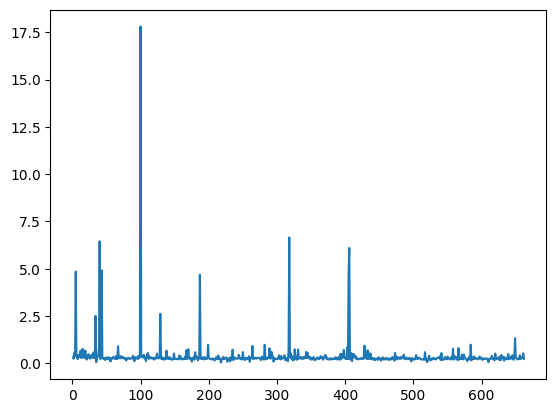

In [ ]:
plt.plot(response_sti_diff)

In [ ]:
len(events)

662

In [ ]:
len(choice)

496

In [ ]:
accuracy

array([ 1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,
       -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1

In [ ]:
# 2. Evaluate the number of good clusters
# The spikesortingloader loads data for all clusters (both mua and good) detected by the spikesorter.
# We can restrict to only the good clusters by finding the clusters with a label of 1
good_cluster_idx = clusters['label'] == 1
clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}

all_clusters = clusters['label'].shape
good_clusters = clusters_good['label'].shape
print(f'Total no. of clusters: {all_clusters}')
print(f'Number of good clusters: {good_clusters}')

Total no. of clusters: (287,)
Number of good clusters: (29,)


In [ ]:
# 3. Find the location of clusters in brain
# The location of the clusters can be found in the atlas_id (Allen CCF ids) or acronym attributes of the clusters object
# To do: is 2 a good number of cluster
acronyms = clusters_good['acronym']
unique_acronyms, count = np.unique(acronyms, return_counts=True)
for a, c in zip(unique_acronyms, count):
  print(f'{a}: {c}')

BST: 5
CP: 11
MOp5: 2
MOp6a: 5
STR: 5
cing: 1


In [ ]:
np.sum(count)

52

In [ ]:
#units, alligned spike counts (movement spike count), plot psth for left and right
#raster plot for individual trail

In [ ]:
#np.array([a == 'ACAv5' for a in acronyms]).sum()

15

In [ ]:
good_cluster_df.shape

(29, 26)

In [ ]:
good_cluster_df = pd.DataFrame(clusters_good)
good_cluster_df.head()

depths                                 uuids  channels  cluster_id  \
9    440.0  a3c062a6-94e6-4a8c-9826-4cab20bfe796        43           9   
17   620.0  54e75d42-c336-46f2-8dba-50c72902e6f9        60          17   
35  1080.0  52f5bc81-0d11-4f5b-ae12-071089e4027a       107          35   
41  1220.0  06ba59e1-db5b-43a2-9c65-d24d4a1db739       121          41   
48  1320.0  bf0bdd62-5d7a-408a-9d56-e967af8e1e1b       130          48   

     amp_max   amp_min  amp_median  amp_std_dB  contamination  \
9   0.000262  0.000109    0.000143    1.640002       0.009041   
17  0.000498  0.000129    0.000213    3.194278       0.017037   
35  0.000252  0.000084    0.000132    2.131759       0.010291   
41  0.000202  0.000067    0.000128    1.685102       0.005952   
48  0.000313  0.000111    0.000219    1.032227       0.122927   

    contamination_alt  ...  spike_count  firing_rate  label         x  \
9            0.008364  ...      30362.0     6.505444    1.0 -0.001063   
17           0.015655  ...      32806.0     7.029102    1.0 -0.001087   
35           0.009504  ...      17998.0     3.856300    1.0 -0.001178   
41           0.005522  ...      16735.0     3.585686    1.0 -0.001189   
48           0.103709  ...       6378.0     1.366567    1.0 -0.001189   

           y         z  acronym  atlas_id  axial_um  lateral_um  
9  -0.000023 -0.004791      BST       351     440.0        27.0  
17  0.000023 -0.004621      BST       351     620.0        43.0  
35  0.000125 -0.004185      BST       351    1080.0        27.0  
41  0.000125 -0.004047      STR       477    1220.0        11.0  
48  0.000125 -0.003947      STR       477    1320.0        59.0  

[5 rows x 26 columns]

In [ ]:
MOB_df = good_cluster_df[good_cluster_df['acronym']=='MOB']
MOB_df.head()

channels  depths                                 uuids  cluster_id  \
21        39   400.0  27f59907-cd51-4756-b898-c3c6f2f96ac5          21   
37        46   480.0  f2843ddd-68aa-4857-89b1-f3250e739f89          37   
47        57   580.0  2e3bcd46-2302-4df4-9122-48e08f9691f6          47   
59        66   680.0  b3c82aa0-88ea-4ecd-a89f-75611b3e8b28          59   
81        80   820.0  c081e08e-6721-4ed1-b064-5aa648d45c90          81   

     amp_max   amp_min  amp_median  amp_std_dB  contamination  \
21  0.000726  0.000167    0.000323    1.279657       0.014373   
37  0.000751  0.000163    0.000315    1.341803       0.023191   
47  0.000832  0.000206    0.000401    1.305776       0.013266   
59  0.000437  0.000105    0.000225    1.005943       0.042364   
81  0.000486  0.000137    0.000278    1.002753       0.000278   

    contamination_alt  ...  spike_count  firing_rate  label         x  \
21           0.013427  ...     149367.0    34.769368    1.0 -0.000300   
37           0.021479  ...      98282.0    22.877898    1.0 -0.000316   
47           0.012331  ...     118784.0    27.650315    1.0 -0.000345   
59           0.038086  ...      56454.0    13.141255    1.0 -0.000375   
81           0.000260  ...      74227.0    17.278421    1.0 -0.000417   

           y         z  acronym  atlas_id  axial_um  lateral_um  
21  0.003161 -0.004363      MOB       507     400.0        27.0  
37  0.003176 -0.004286      MOB       507     480.0        59.0  
47  0.003206 -0.004196      MOB       507     580.0        11.0  
59  0.003236 -0.004105      MOB       507     680.0        59.0  
81  0.003271 -0.003977      MOB       507     820.0        43.0  

[5 rows x 26 columns]

In [ ]:
FRP_df = good_cluster_df[good_cluster_df['acronym']=='FRP2/3']
FRP_df

uuids  channels  depths  cluster_id  \
327  81e14f70-ad40-4fae-ad7d-935995be0e9b       265  2660.0         327   
328  615ebb93-0026-4da5-8ddd-fdbd65422ab0       268  2700.0         328   
330  5ac32aae-a92a-4331-9ba5-a3d4df88e9ab       270  2720.0         330   
344  e5bdb552-3f87-4df0-b210-877cdff73929       281  2820.0         344   
352  fbd15562-4844-407b-8d58-7f5753494ed6       285  2860.0         352   
355  87f425f4-e7fd-4ab9-b67e-67599332f6ec       285  2860.0         355   
364  e4681afe-3331-49ac-bcd4-209cd39dd9e6       289  2900.0         364   
382  e5d5210f-d77c-4419-b4d3-f9e078f05755       296  2980.0         382   
384  24f8cacd-fc9c-4a52-8484-925e9b9a0a77       298  3000.0         384   
386  e2f86c54-5223-477b-abd0-2f4a410c5f39       297  2980.0         386   
389  09a8f90f-b266-4510-b544-a30ffc666cc0       299  3000.0         389   
391  f390eb31-3612-4616-9184-f9a3279422c2       302  3040.0         391   
394  fee29980-7c72-4aed-a14f-d8f423e8fa5f       303  3040.0         394   
402  51537e99-6241-4d4a-a8af-529d845101cc       308  3100.0         402   
409  86d681c8-0776-475b-a441-63359c2e8dbd       312  3140.0         409   
423  0d303479-9ae5-437c-944c-edc2d1322d8b       322  3240.0         423   
484  98669697-1778-46ce-a06d-6c516cdf7593       269  2700.0         484   
502  154febf5-4e32-4b72-b7c7-b08eaa9bc601       322  3240.0         502   
516  e5263036-f6fa-4401-8e87-f851b050f8bd       290  2920.0         516   
517  35de44eb-3af7-4a79-967d-e5584af6c51d       290  2920.0         517   

      amp_max   amp_min  amp_median  amp_std_dB  contamination  \
327  0.000118  0.000034    0.000058    1.379983       0.000000   
328  0.000114  0.000039    0.000075    1.033656       0.000000   
330  0.000116  0.000046    0.000070    1.031269       0.296440   
344  0.000198  0.000047    0.000087    1.362374       0.000000   
352  0.000471  0.000072    0.000174    2.039916       0.039558   
355  0.000113  0.000056    0.000075    1.366029       0.000000   
364  0.000583  0.000165    0.000275    1.629743       0.053423   
382  0.000233  0.000061    0.000109    1.345380       0.000000   
384  0.000129  0.000030    0.000059    2.063264       0.441275   
386  0.000169  0.000051    0.000101    2.782197       0.000000   
389  0.000307  0.000061    0.000124    1.569485       0.018947   
391  0.000272  0.000049    0.000093    1.477613       0.108850   
394  0.000352  0.000064    0.000139    1.284852       0.046609   
402  0.000236  0.000075    0.000133    1.155378       0.000000   
409  0.000145  0.000052    0.000096    1.138509       0.315427   
423  0.000161  0.000066    0.000097    1.167162       0.000000   
484  0.000099  0.000031    0.000057    1.290894       0.000000   
502  0.000215  0.000076    0.000125    1.219212       0.000000   
516  0.000096  0.000037    0.000060    1.637839       0.000000   
517  0.000105  0.000042    0.000079    1.103839       0.000000   

     contamination_alt  ...  spike_count  firing_rate  label         x  \
327           0.000000  ...       7492.0     1.743974    1.0 -0.000811   
328           0.000000  ...       8256.0     1.921816    1.0 -0.000816   
330           0.207866  ...       2275.0     0.529570    1.0 -0.000819   
344           0.000000  ...       3799.0     0.884324    1.0 -0.000831   
352           0.034076  ...      24120.0     5.614608    1.0 -0.000836   
355           0.000000  ...        942.0     0.219277    1.0 -0.000836   
364           0.032436  ...       5359.0     1.247458    1.0 -0.000844   
382           0.000000  ...       3116.0     0.725337    1.0 -0.000866   
384           0.311932  ...       2637.0     0.613836    1.0 -0.000872   
386           0.000000  ...       6502.0     1.513523    1.0 -0.000866   
389           0.017184  ...      73106.0    17.017476    1.0 -0.000872   
391           0.092898  ...       8395.0     1.954172    1.0 -0.000883   
394           0.041705  ...      32959.0     7.672134    1.0 -0.000883   
402           0.000000  ...       440

In [ ]:
#we need to make sure the eid contain STR
STR_df = good_cluster_df[good_cluster_df['acronym']=='STR']
STR_df

depths  channels                                 uuids  cluster_id  \
265  1180.0       116  4e6adb2c-eaed-4eb4-99e5-6dcf5d1a49e6         265   
266  1180.0       116  46f4fb85-6c77-4069-b724-13f296857b78         266   
267  1180.0       117  ae78dd20-225c-4f1d-b969-bbc19c9c8884         267   
268  1180.0       117  ffb290cd-e520-460d-bc2f-74464c5c41b6         268   
271  1200.0       118  7359ac43-3ce0-4c7a-96e0-0460d147f1ce         271   
272  1280.0       126  1ea0efad-beb8-4cdd-aa1d-1f65133d3e48         272   
280  1220.0       120  225795a3-8c73-48b1-8e16-8a3c5bea826a         280   
281  1220.0       121  8c0f1ae8-1ada-441b-b1ea-c7be9beb0ca4         281   
285  1240.0       122  0f2d1e81-6062-4d1f-9aae-d36c2da69a0f         285   
286  1240.0       122  b30eb6ee-bf67-49c8-9080-eb6c26ead8dd         286   
289  1240.0       123  dec4d115-bdd0-4922-8286-570ea16536a0         289   
291  1260.0       124  8e96d074-1b9d-4089-a4cd-93e7fb9bbf80         291   
293  1260.0       124  2fb35841-583a-41b2-a175-4198ec24ee67         293   
294  1260.0       125  528a2167-6944-4591-8445-51978b06a52d         294   
295  1260.0       125  37bdc154-7827-4e2d-9dba-d989ca808b60         295   
297  1260.0       125  26eb6149-5051-45b2-a79b-53d89131cb9b         297   
299  1280.0       126  6ebc7b41-d622-4dfb-b7e4-9cd60a9a3302         299   
301  1280.0       126  bdcab905-a36e-45ef-8b66-edf53e6982aa         301   
304  1280.0       127  23cda9fd-e5a7-4b34-96da-4e97c0792568         304   
305  1280.0       127  8b38db23-6dae-4412-b03b-467054a2317d         305   
308  1300.0       128  84768924-6b47-4643-b7e6-116cfe5d34a9         308   
313  1320.0       130  5704b313-48e7-46c3-bbb8-3b390723d609         313   
317  1340.0       132  8fdbe69c-ff7e-4a70-8fba-004236489cca         317   
319  1340.0       133  fcf68f78-57a4-4bde-a724-0850dc9afd4b         319   
320  1340.0       133  3ccfbd9d-0ce9-4518-b28e-a67680940e4a         320   
326  1360.0       135  2700fc21-7c34-442c-b125-2ce2d5cec183         326   
330  1380.0       137  5e8fb6ef-ef99-4d25-9f36-90cb260eb4b5         330   
332  1380.0       137  f84772c8-f11d-4bf5-b9d7-9279e96db5f0         332   
333  1400.0       138  b7149af7-1c42-4d9b-9f78-ce89d205131b         333   
339  1400.0       139  db766451-738f-4350-b1d5-4978a3611763         339   
345  1420.0       141  c23f6670-7075-44b4-93d9-e92cd4b9f597         345   
349  1440.0       143  3de0d565-e06a-4815-b764-c643813bdb06         349   
352  1460.0       144  8b0b1711-a077-4963-a94f-849949860fee         352   
353  1460.0       145  18d76ead-5df8-4ea6-837f-a89df9657425         353   
356  1460.0       145  230916e3-29fe-46a0-9268-878e2aa48a33         356   
747  1200.0       118  936528ff-f267-4dc2-9b16-9d8aeb1c1d71         747   
754  1240.0       122  5474a62a-01c4-4a8d-8b01-0e54846a9ba5         754   
758  1280.0       126  51999f41-17af-44f0-935f-37296d3d70d3         758   

      amp_max   amp_min  amp_median  amp_std_dB  contamination  \
265  0.000383  0.000128    0.000229    0.806375       0.000000   
266  0.000253  0.000082    0.000166    1.238000       0.000000   
267  0.000556  0.000146    0.000257    1.163462       0.154306   
268  0.000671  0.000188    0.000310    1.050531       0.124330   
271  0.000317  0.000106    0.000183    1.112661       0.000000   
272  0.000149  0.000044    0.000080    1.197623       0.015687   
280  0.000266  0.000082    0.000150    1.069566       0.032977   
281  0.000309  0.000077    0.000139    1.380025       0.006336   
285  0.000510  0.000186    0.000313    1.186260       0.000000   
286  0.000305  0.000078    0.000160    1.031068       0.000000   
289  0.000553  0.000172    0.000331    0.910046       0.000000   
291  0.000487  0.000173    0.000323    1.153901       0.000000   
293  0.000172  0.000053    0.000096    1.200390       0.005460   
294  0.000436  0.000153    0.000260    1.162884       0.000000   
295  0.000252  0.000074    0.000146    1.123061       0.023867   
297  0.000246  0.000069

In [ ]:
# ---------------------------------------------------
# Select a time window of interest
#time_window = np.array([-0.1, 0.0])  # 100 ms before the event
#time_window = np.array([-0.5, 1.5])  # 100 ms before the event + 100 ms after the event
#time_window = np.array([0.0, 1])
time_window = np.array([0.0, 1])
#time_window = np.array([0.0, 3])
#time_window = np.array([-0.2, 1])

In [ ]:
#to do: do we need wheel data?

In [ ]:
# ---------------------------------------------------
# Compute spike rate around event
events_tw = np.array([events+time_window[0], events+time_window[1]]).T #the event is a time point
#our window start 100ms before each event (that is: before the mouse moves the wheel), the time window before the action may be where decision happened

# Compute count (for all clusters of interest) (THIS CAN TAKE A WHILE)
spike_count, cluster_id = get_spike_counts_in_bins(spikes_g['times'], spikes_g['clusters'], events_tw) #agg count

# Compute rate (for all clusters of interest)
spike_rate = np.zeros((num_neuron, num_trial))
spike_rate = spike_count / (time_window[1] - time_window[0]) #spike count / time window length

# ---------------------------------------------------
# Compute the modulation index
modulation_index = np.divide((np.mean(spike_rate[:, indx_choice_a], 1) - np.mean(spike_rate[:, indx_choice_b], 1)),
                             (np.mean(spike_rate[:, indx_choice_a], 1) + np.mean(spike_rate[:, indx_choice_b], 1)))
#To do: what is this? The modulation index (or modulation depth) of a modulation scheme describes by how much the modulated variable of the carrier signal varies around its unmodulated level. It is defined differently in each modulation scheme.

In [ ]:
len(events)

522

In [ ]:
spike_count.shape

(248, 552)

In [ ]:
spike_count

array([[0, 0, 0, ..., 0, 0, 0],
       [3, 0, 1, ..., 1, 0, 1],
       [2, 0, 2, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

In [ ]:
cluster_id

array([ 15,  25,  26,  28,  31,  38,  39,  44,  48,  49,  52,  53,  54,
        65,  72,  73,  75,  78,  79,  81,  84,  86,  90,  91,  92,  96,
        99, 106, 110, 113, 114, 115, 116, 121, 122, 124, 125, 126, 128,
       129, 131, 137, 139, 141, 143, 147, 149, 154, 155, 156, 159, 160,
       162, 163, 164, 167, 171, 172, 174, 176, 177, 178, 180, 181, 182,
       183, 185, 187, 188, 192, 195, 200, 202, 204, 205, 209, 210, 213,
       214, 217, 218, 221, 225, 226, 236, 237, 239, 243, 249, 258, 259,
       260, 261, 263, 265, 266, 268, 271, 277, 280, 281, 282, 285, 287,
       293, 294, 295, 298, 299, 300, 305, 306, 308, 309, 312, 315, 317,
       320, 324, 335, 336, 337, 338, 342, 344, 346, 349, 353, 354, 356,
       358, 363, 364, 365, 367, 368, 371, 372, 375, 379, 381, 385, 386,
       388, 390, 392, 393, 394, 397, 399, 403, 404, 405, 408, 410, 411,
       412, 416, 417, 418, 424, 428, 439, 442, 443, 452, 454, 466, 467,
       468, 471, 475, 476, 477, 482, 486, 491, 492, 493, 495, 49

In [ ]:
12 in STR_df['cluster_id'].to_list()

False

In [ ]:
STR_idx = [i for i in range(len(cluster_id)) if cluster_id[i] in STR_df['cluster_id'].to_list() ]

In [ ]:
FRP_idx = [i for i in range(len(cluster_id)) if cluster_id[i] in FRP_df['cluster_id'].to_list() ]

In [ ]:
FRP_idx

[27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 47,
 48,
 50,
 51]

In [ ]:
len(STR_idx)

64

In [ ]:
spike_count.shape

(248, 552)

In [ ]:
spike_count[0]

In [ ]:
spike_count_STR = spike_count[STR_idx, :]
spike_count_STR.shape

(38, 496)

In [ ]:
spike_count_STR

array([[ 0,  0,  0, ...,  0,  2,  2],
       [ 0,  0,  0, ...,  2,  6,  3],
       [11,  5,  4, ...,  4,  7,  9],
       ...,
       [ 0,  0,  0, ...,  0,  3,  3],
       [ 2,  2,  1, ...,  1,  4,  1],
       [ 0,  1,  1, ...,  3,  2,  0]], dtype=uint32)

In [ ]:
#we decide to have 10 bins in each trial, that is 10ms per time bin

In [ ]:
events_tw

array([[  40.07695523,   40.17695523],
       [  45.76395523,   45.86395523],
       [  49.82495523,   49.92495523],
       ...,
       [2827.13695523, 2827.23695523],
       [2849.63795523, 2849.73795523],
       [2861.23295523, 2861.33295523]])

In [ ]:
1.2/20

0.06

In [ ]:
events_tb = []
num_bins = 20

# Iterate through each pair in the 2D array
for pair in events_tw :
    start, end = pair
    step = 1/20 #(end - start) / (num_bins)# -1)
    for i in range(num_bins):
      events_tb.append([start+i*step, start+(i+1)*step])
    # bins_per_trial = [start + i * step for i in range(num_bins)]
    # events_tb.append(bins_per_trial)

In [ ]:
events_tw.shape

(609, 2)

In [ ]:
496*20

9920

In [ ]:
events_tb = np.array(events_tb)
events_tb

array([[ 114.39807466,  114.44807466],
       [ 114.44807466,  114.49807466],
       [ 114.49807466,  114.54807466],
       ...,
       [3091.29434229, 3091.34434229],
       [3091.34434229, 3091.39434229],
       [3091.39434229, 3091.44434229]])

In [ ]:
events_tb.shape

(9920, 2)

In [ ]:
# Compute count (for all clusters of interest) (THIS CAN TAKE A WHILE)
spike_count_per_bin, cluster_id = get_spike_counts_in_bins(spikes_g['times'], spikes_g['clusters'], events_tb) #agg count

In [ ]:
spike_count_per_bin_FRP = spike_count_per_bin[FRP_idx, :]
spike_count_per_bin_FRP.shape

(20, 10440)

In [ ]:
spike_count_per_bin_STR = spike_count_per_bin[STR_idx, :]
spike_count_per_bin_STR.shape

(38, 9920)

In [ ]:
np.unique(spike_count_per_bin_STR[20])

array([0, 1, 2], dtype=uint32)

In [ ]:
spike_count_per_bin.shape

(248, 5520)

In [ ]:
spike_count.shape

(248, 552)

In [ ]:
spikes_g['times']

array([1.03251145e-02, 1.12917831e-02, 1.16584505e-02, ...,
       5.81658914e+03, 5.81659131e+03, 5.81659448e+03])

In [ ]:
print('# of time bins --> trials (in each cluster): '+str(len(spike_count[0])))
print('# of cluster (in each row): ' +str(len(spike_count)))

# of time bins --> trials (in each cluster): 496
# of cluster (in each row): 202


In [ ]:
# ---------------------------------------------------
# Compute p-value to assess significance of encoding (THIS CAN TAKE A WHILE)
p_1 = get_choice_time_shuffle(spike_rate, contrast_L, contrast_R, block, choice, 1000)
#does the behavior of mice appear stastically significant
# Find those that are significant to 0.01
p_sig = np.zeros(p_1.shape)
p_sig[np.where(p_1 < 0.01)] = 1

Now we plot the modulation index value for each neuron along the probe depth, colored according to the level of significance. We can see that only one unit is significantly modulated (the one colored in yellow).

In [ ]:
#can try to see if units are also selective to left / right conditions _after_ the first move, or _after_ the stimulus onset for example.

In [ ]:
cluster_STR_IDs = np.array(STR_df['cluster_id'])#np.array([161, 386])

In [ ]:
!pip install git+https://github.com/yuanz271/vlgpax.git

  Cloning https://github.com/yuanz271/vlgpax.git to /tmp/pip-req-build-n010fph6
  Running command git clone --filter=blob:none --quiet https://github.com/yuanz271/vlgpax.git /tmp/pip-req-build-n010fph6
  Resolved https://github.com/yuanz271/vlgpax.git to commit 0a4af5f19f20ed5a6b3c775887c127220bfbb185
  Preparing metadata (setup.py) ... done
  Created wheel for vlgpax: filename=vlgpax-2021.6.21-py3-none-any.whl size=10351 sha256=e3dba5faad1480f3cdc63b50a9072d69a7a25486771b224a39e58821881d3cd9
  Stored in directory: /tmp/pip-ephem-wheel-cache-4bwcxmv_/wheels/cc/54/08/e3f4f605aeb4faa23c72029532c3357937cb15cfc9698bf742
Successfully built vlgpax


In [ ]:
import math
import jax.random
import numpy as np
from matplotlib import pyplot as plt
from vlgpax.model import Session
from vlgpax.kernel import RBF, RFF
from vlgpax import vi

In [ ]:
spike_count_per_bin_STR.shape

(38, 9920)

In [ ]:
spike_count_per_bin_FRP.shape

(20, 10440)

In [ ]:
spike_count_per_bin.shape

(51, 12180)

In [ ]:
spike_count_per_bin_FRP.shape[1]

10440

In [ ]:
#do not continuous time points of trail
y = spike_count_per_bin#spike_count_per_bin_STR
T = spike_count_per_bin.shape[1] #5520*0.1/10 = 55.2
dt = 1/20

In [ ]:
#do not continuous time points of trail
y = spike_count_per_bin_FRP#spike_count_per_bin_STR
T = spike_count_per_bin_FRP.shape[1] #5520*0.1/10 = 55.2
dt = 2/20

In [ ]:
y.shape

(20, 10440)

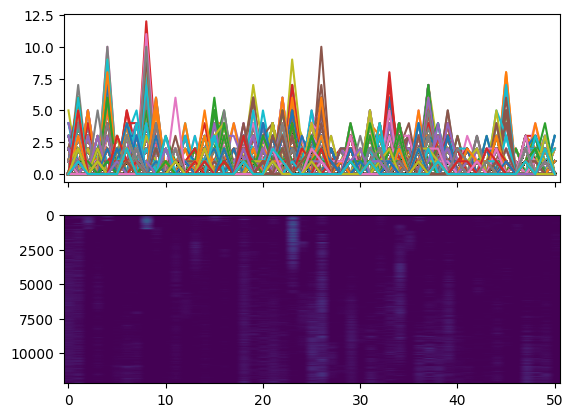

In [ ]:
# %% Draw all
fig, ax = plt.subplots(2, 1, sharex='all')
#ax[0].plot(z)  # latent
ax[0].plot(y)  # spikes
ax[1].imshow(y.T, aspect='auto')  # show spikes in heatmap

In [ ]:
random_seed = 0

In [ ]:
num_trials = len(events)
num_trials

662

In [ ]:
y.shape

(38, 9920)

In [ ]:
ys.shape

(496, 38, 20)

In [ ]:
y.shape[0]

38

In [ ]:
num_trials*0.75

372.0

In [ ]:
# %% Setup inference
ys = np.reshape(y,
                (num_trials, y.shape[0], T // num_trials))  # Split the spike train into trials
                #to do change the number
session = Session(dt)  # Construct a session.

#Create training and testing data
num_train = int(num_trials*0.75)
sessionTrain = Session(dt)
for i in range(num_train):
    sessionTrain.add_trial(i, y=ys[i].T)

sessionTest = Session(dt)
for i in range(num_train, len(ys)):
    sessionTest.add_trial(i, y=ys[i].T)


# Session is the top level container of data. Two arguments, binsize and unit of time, are required at construction.
# for i, y in enumerate(ys):
#     session.add_trial(i + 1, y=y)  # Add trials to the session.
# Trial is the basic unit of observation, regressor, latent factors and etc.
# tid and y are only required argument to construct a trial.
# tid is an unique identifier of the trial,
# y is the spike train,
# x is an optional argument that represents the design matrix of
# such as spike history, stimuli, behavior, neuron coupling and etc.
# An constant column for bias is generated automatically if x is absent

In [ ]:
ys.shape

(522, 20, 20)

In [ ]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
from einops import rearrange

In [ ]:
ys[0].shape[1]

20

In [ ]:
ys.shape

(609, 51, 20)

In [ ]:
dt

0.06

In [ ]:
#MO, 100ms after stimulus, 20 tb
kernel = RBF(scale=1., lengthscale=10 * dt)
sessionTrain, params = vi.fit(sessionTrain, n_factors=2, kernel=kernel, seed=0, max_iter=50, trial_length=20, GPFA=True)
z_train = rearrange(sessionTrain.z, '(trials time) lat -> trials time lat', time=20)

# Infer latents of test data
sessionTest = vi.infer(sessionTest, params=params)
z_test = rearrange(sessionTest.z, '(trials time) lat -> trials time lat', time=20)

Initializing
Initialized


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning:

E: loss increased



EM Iteration 1, 	Loss = 6.0984, 	M step: 3.31s, 	E step: 2.27s
EM Iteration 2, 	Loss = 6.0565, 	M step: 1.61s, 	E step: 0.91s
EM Iteration 3, 	Loss = 6.0331, 	M step: 1.00s, 	E step: 0.91s
EM Iteration 4, 	Loss = 6.0172, 	M step: 0.99s, 	E step: 0.97s
EM Iteration 5, 	Loss = 6.0063, 	M step: 0.98s, 	E step: 0.96s
EM Iteration 6, 	Loss = 5.9988, 	M step: 0.99s, 	E step: 1.00s
EM Iteration 7, 	Loss = 5.9939, 	M step: 0.98s, 	E step: 1.45s
EM Iteration 8, 	Loss = 5.9909, 	M step: 1.59s, 	E step: 1.02s
EM Iteration 9, 	Loss = 5.9892, 	M step: 0.96s, 	E step: 1.05s
EM Iteration 10, 	Loss = 5.9887, 	M step: 0.96s, 	E step: 1.09s
EM Iteration 11, 	Loss = 5.9890, 	M step: 0.98s, 	E step: 1.11s
Inferring
Trial 0, 	Loss = 9.8060
Trial 1, 	Loss = 13.3277
Trial 2, 	Loss = 13.3964
Trial 3, 	Loss = 13.7035
Trial 4, 	Loss = 15.0925
Trial 5, 	Loss = 14.0108
Trial 6, 	Loss = 13.4159
Trial 7, 	Loss = 16.1483
Trial 8, 	Loss = 15.1806
Trial 9, 	Loss = 15.8368
Trial 10, 	Loss = 16.1866
Trial 11, 	Loss = 14

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:405: UserWarning:

EM: loss increased



Trial 24, 	Loss = 2.9791
Trial 25, 	Loss = -0.6228
Trial 26, 	Loss = 0.3960
Trial 27, 	Loss = -0.5562
Trial 28, 	Loss = -0.3402
Trial 29, 	Loss = 0.4194
Trial 30, 	Loss = -1.3146
Trial 31, 	Loss = 3.0437
Trial 32, 	Loss = 3.8178
Trial 33, 	Loss = 8.7046
Trial 34, 	Loss = 7.9882
Trial 35, 	Loss = 0.5193
Trial 36, 	Loss = 2.9063
Trial 37, 	Loss = 9.4699
Trial 38, 	Loss = 3.7727
Trial 39, 	Loss = 17.1430
Trial 40, 	Loss = 15.4762
Trial 41, 	Loss = 10.1952
Trial 42, 	Loss = 13.9325
Trial 43, 	Loss = 14.6040
Trial 44, 	Loss = 18.9045
Trial 45, 	Loss = 17.2127
Trial 46, 	Loss = 14.6545
Trial 47, 	Loss = 15.9978
Trial 48, 	Loss = 16.3641
Trial 49, 	Loss = 14.7147
Trial 50, 	Loss = 13.1611
Trial 51, 	Loss = 16.2429
Trial 52, 	Loss = 15.2411
Trial 53, 	Loss = 15.2484
Trial 54, 	Loss = 16.0163
Trial 55, 	Loss = 14.6551
Trial 56, 	Loss = 14.6136
Trial 57, 	Loss = 16.3469
Trial 58, 	Loss = 16.5107
Trial 59, 	Loss = 15.2855
Trial 60, 	Loss = 17.5018
Trial 61, 	Loss = 15.2761
Trial 62, 	Loss = 14.40

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning:

E: loss increased



Trial 566, 	Loss = 6.1269
Trial 567, 	Loss = 9.6702
Trial 568, 	Loss = 10.4927
Trial 569, 	Loss = 5.2118
Trial 570, 	Loss = 11.1911
Trial 571, 	Loss = 7.6719
Trial 572, 	Loss = 11.1699
Trial 573, 	Loss = 7.3011
Trial 574, 	Loss = 10.2063
Trial 575, 	Loss = 12.6087
Trial 576, 	Loss = 12.4447
Trial 577, 	Loss = 11.4895
Trial 578, 	Loss = 10.2728
Trial 579, 	Loss = 13.5568
Trial 580, 	Loss = 13.1001
Trial 581, 	Loss = 12.5130
Trial 582, 	Loss = 13.7420
Trial 583, 	Loss = 8.7524
Trial 584, 	Loss = 15.2765
Trial 585, 	Loss = 13.7859
Trial 586, 	Loss = 11.3478
Trial 587, 	Loss = 16.7635
Trial 588, 	Loss = 14.2380
Trial 589, 	Loss = 13.8259
Trial 590, 	Loss = 15.6269
Trial 591, 	Loss = 14.5933
Trial 592, 	Loss = 11.0442
Trial 593, 	Loss = 18.0607
Trial 594, 	Loss = 21.5858
Trial 595, 	Loss = 20.8047
Trial 596, 	Loss = 20.1504
Trial 597, 	Loss = 20.6697
Trial 598, 	Loss = 21.1026
Trial 599, 	Loss = 20.9149
Trial 600, 	Loss = 21.4548
Trial 601, 	Loss = 21.4022
Trial 602, 	Loss = 16.1816
Trial 6

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning:

E: maximum number of iterations reached



Trial 610, 	Loss = 17.4106
Trial 611, 	Loss = 20.5143
Trial 612, 	Loss = 14.5910
Trial 613, 	Loss = 6.2833
Trial 614, 	Loss = 11.7204
Trial 615, 	Loss = 14.6930
Trial 616, 	Loss = 3.6955
Trial 617, 	Loss = -5.7539
Trial 618, 	Loss = -5.3165
Trial 619, 	Loss = -4.0576
Trial 620, 	Loss = -5.2296
Trial 621, 	Loss = -5.7247
Trial 622, 	Loss = -5.4762
Trial 623, 	Loss = -5.2534
Trial 624, 	Loss = -6.1630
Trial 625, 	Loss = -4.3602
Trial 626, 	Loss = -4.7417
Trial 627, 	Loss = -5.5030
Trial 628, 	Loss = -5.7156
Trial 629, 	Loss = -4.6820
Trial 630, 	Loss = -5.5006
Trial 631, 	Loss = -5.2989
Trial 632, 	Loss = -4.1738
Trial 633, 	Loss = -5.4848
Trial 634, 	Loss = -4.4125
Trial 635, 	Loss = -5.2850
Trial 636, 	Loss = -5.2942
Trial 637, 	Loss = -4.9006
Trial 638, 	Loss = -5.4686
Trial 639, 	Loss = 4.1422
Trial 640, 	Loss = 3.1003
Trial 641, 	Loss = 6.2399
Trial 642, 	Loss = 6.3528
Trial 643, 	Loss = 4.3809
Trial 644, 	Loss = 4.5638
Trial 645, 	Loss = 5.2563
Trial 646, 	Loss = 5.0417
Trial 647, 

In [ ]:
plot_trajectories2L(z_train, choice[:num_train], accuracy[:num_train], 0.05 * 1000)

In [ ]:
#FRP, 200ms after stimulus, 20 tb
kernel = RBF(scale=1., lengthscale=10 * dt)
sessionTrain, params = vi.fit(sessionTrain, n_factors=2, kernel=kernel, seed=0, max_iter=50, trial_length=20, GPFA=True)
z_train = rearrange(sessionTrain.z, '(trials time) lat -> trials time lat', time=20)

# Infer latents of test data
sessionTest = vi.infer(sessionTest, params=params)
z_test = rearrange(sessionTest.z, '(trials time) lat -> trials time lat', time=20)

Initializing
Initialized


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


EM Iteration 1, 	Loss = -0.8813, 	M step: 8.99s, 	E step: 3.01s
EM Iteration 2, 	Loss = -1.0105, 	M step: 1.18s, 	E step: 1.17s
EM Iteration 3, 	Loss = -1.0901, 	M step: 2.33s, 	E step: 2.95s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning: E: maximum number of iterations reached
  warnings.warn(f'E: maximum number of iterations reached')


EM Iteration 4, 	Loss = -1.1423, 	M step: 1.79s, 	E step: 1.08s
EM Iteration 5, 	Loss = -1.1769, 	M step: 1.04s, 	E step: 2.29s
EM Iteration 6, 	Loss = -1.2005, 	M step: 3.82s, 	E step: 4.15s
EM Iteration 7, 	Loss = -1.2170, 	M step: 1.06s, 	E step: 1.19s
EM Iteration 8, 	Loss = -1.2285, 	M step: 0.86s, 	E step: 1.28s
EM Iteration 9, 	Loss = -1.2365, 	M step: 0.86s, 	E step: 1.40s
EM Iteration 10, 	Loss = -1.2421, 	M step: 0.87s, 	E step: 1.99s
EM Iteration 11, 	Loss = -1.2459, 	M step: 1.42s, 	E step: 1.41s
EM Iteration 12, 	Loss = -1.2483, 	M step: 0.87s, 	E step: 1.47s
EM Iteration 13, 	Loss = -1.2498, 	M step: 0.79s, 	E step: 1.42s
EM Iteration 14, 	Loss = -1.2505, 	M step: 0.81s, 	E step: 1.38s
EM Iteration 15, 	Loss = -1.2508, 	M step: 0.81s, 	E step: 1.70s
EM Iteration 16, 	Loss = -1.2505, 	M step: 1.32s, 	E step: 1.70s
Inferring
Trial 0, 	Loss = -6.5693
Trial 1, 	Loss = -6.5693
Trial 2, 	Loss = -6.5693
Trial 3, 	Loss = -6.0532
Trial 4, 	Loss = -5.8040
Trial 5, 	Loss = -4.5101
T

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:405: UserWarning: EM: loss increased
  warnings.warn('EM: loss increased')


Trial 19, 	Loss = -1.0590
Trial 20, 	Loss = 0.7118
Trial 21, 	Loss = 3.8365
Trial 22, 	Loss = 3.6172
Trial 23, 	Loss = -1.8982
Trial 24, 	Loss = 6.1082
Trial 25, 	Loss = 8.6938
Trial 26, 	Loss = -2.4032
Trial 27, 	Loss = -6.0261
Trial 28, 	Loss = -5.7966
Trial 29, 	Loss = -5.2800
Trial 30, 	Loss = -4.8530
Trial 31, 	Loss = -3.4152
Trial 32, 	Loss = -3.3471
Trial 33, 	Loss = -0.8453
Trial 34, 	Loss = -2.5480
Trial 35, 	Loss = -0.4904
Trial 36, 	Loss = 0.9093
Trial 37, 	Loss = -1.2465
Trial 38, 	Loss = -0.3749
Trial 39, 	Loss = -0.8451
Trial 40, 	Loss = -0.4546
Trial 41, 	Loss = 7.0993
Trial 42, 	Loss = 7.3787
Trial 43, 	Loss = 7.1645
Trial 44, 	Loss = 5.1010
Trial 45, 	Loss = 5.8794
Trial 46, 	Loss = 6.7221
Trial 47, 	Loss = 8.1633
Trial 48, 	Loss = 4.7891
Trial 49, 	Loss = 7.2051
Trial 50, 	Loss = 8.3779
Trial 51, 	Loss = 8.8952
Trial 52, 	Loss = -2.1866
Trial 53, 	Loss = -6.5693
Trial 54, 	Loss = -6.5693
Trial 55, 	Loss = -6.5693
Trial 56, 	Loss = -6.5693
Trial 57, 	Loss = -6.5693
Tri

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


Trial 409, 	Loss = -6.5693
Trial 410, 	Loss = -6.5693
Trial 411, 	Loss = -6.5693
Trial 412, 	Loss = -6.5693
Trial 413, 	Loss = -6.0905
Trial 414, 	Loss = -6.2899
Trial 415, 	Loss = -6.5693
Trial 416, 	Loss = -6.5693
Trial 417, 	Loss = -5.0833
Trial 418, 	Loss = -6.5693
Trial 419, 	Loss = -6.5693
Trial 420, 	Loss = -5.8541
Trial 421, 	Loss = -6.5693
Trial 422, 	Loss = -6.5693
Trial 423, 	Loss = -6.5693
Trial 424, 	Loss = -6.5693
Trial 425, 	Loss = -6.5693
Trial 426, 	Loss = -6.3015
Trial 427, 	Loss = -6.5693
Trial 428, 	Loss = -6.5693
Trial 429, 	Loss = -6.5693
Trial 430, 	Loss = -6.2948
Trial 431, 	Loss = -6.5693
Trial 432, 	Loss = -6.3142
Trial 433, 	Loss = -6.5693
Trial 434, 	Loss = -6.3178
Trial 435, 	Loss = -6.5693
Trial 436, 	Loss = -6.3216
Trial 437, 	Loss = -6.5693
Trial 438, 	Loss = -6.5693
Trial 439, 	Loss = -6.5693
Trial 440, 	Loss = -6.5693
Trial 441, 	Loss = -6.5693
Trial 442, 	Loss = -6.3068
Trial 443, 	Loss = -5.3567
Trial 444, 	Loss = 11.2792
Trial 445, 	Loss = 4.3833
Tr

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning: E: maximum number of iterations reached
  warnings.warn(f'E: maximum number of iterations reached')


Trial 464, 	Loss = -6.5693
Trial 465, 	Loss = -6.5693
Trial 466, 	Loss = -6.5693
Trial 467, 	Loss = -6.3034
Trial 468, 	Loss = -6.5693
Trial 469, 	Loss = -5.8361
Trial 470, 	Loss = -6.5693
Trial 471, 	Loss = -6.5693
Trial 472, 	Loss = -6.5693
Trial 473, 	Loss = -6.5693
Trial 474, 	Loss = -6.5693
Trial 475, 	Loss = -6.5693
Trial 476, 	Loss = -5.2334
Trial 477, 	Loss = 4.2139
Trial 478, 	Loss = 6.4172
Trial 479, 	Loss = 6.9803
Trial 480, 	Loss = 1.1627
Trial 481, 	Loss = -5.2941
Trial 482, 	Loss = -6.5693
Trial 483, 	Loss = 3.2177
Trial 484, 	Loss = -6.5693
Trial 485, 	Loss = -6.5693
Trial 486, 	Loss = -6.5693
Trial 487, 	Loss = -6.5693
Trial 488, 	Loss = -6.5693
Trial 489, 	Loss = -6.5693
Trial 490, 	Loss = -6.5693
Trial 491, 	Loss = -6.5693
Trial 492, 	Loss = -6.5693
Trial 493, 	Loss = -6.5693
Trial 494, 	Loss = -6.5693
Trial 495, 	Loss = -6.5693
Trial 496, 	Loss = -6.5693
Trial 497, 	Loss = -6.5693
Trial 498, 	Loss = -4.5801
Trial 499, 	Loss = 0.4867
Trial 500, 	Loss = 5.5600
Trial 50

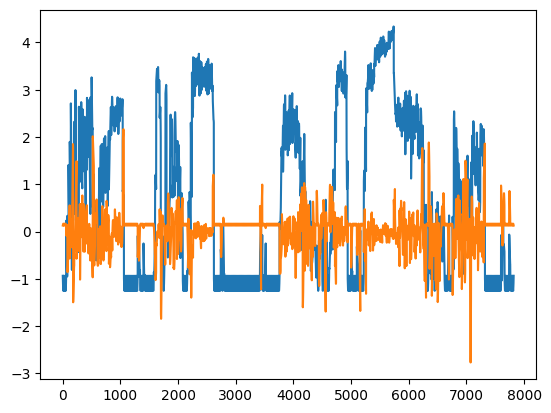

In [ ]:
plt.plot(sessionTrain.z)

In [ ]:
plot_trajectories2L(z_train, choice[:num_train], accuracy[:num_train], 0.1 * 1000)

In [ ]:
kernel = RBF(scale=1., lengthscale=10 * dt)
sessionTrain, params = vi.fit(sessionTrain, n_factors=2, kernel=kernel, seed=10, max_iter=50, trial_length=20, GPFA=True)
z_train = rearrange(sessionTrain.z, '(trials time) lat -> trials time lat', time=20)

# Infer latents of test data
sessionTest = vi.infer(sessionTest, params=params)
z_test = rearrange(sessionTest.z, '(trials time) lat -> trials time lat', time=20)

Initializing
Initialized


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning:

E: loss increased



EM Iteration 1, 	Loss = 9.8661, 	M step: 1.82s, 	E step: 1.38s
EM Iteration 2, 	Loss = 9.7036, 	M step: 1.06s, 	E step: 0.96s
EM Iteration 3, 	Loss = 9.5906, 	M step: 1.05s, 	E step: 1.01s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning:

E: maximum number of iterations reached



EM Iteration 4, 	Loss = 9.5055, 	M step: 1.18s, 	E step: 1.58s
EM Iteration 5, 	Loss = 9.4401, 	M step: 1.35s, 	E step: 1.01s
EM Iteration 6, 	Loss = 9.3890, 	M step: 1.02s, 	E step: 1.01s
EM Iteration 7, 	Loss = 9.3485, 	M step: 1.04s, 	E step: 1.01s
EM Iteration 8, 	Loss = 9.3160, 	M step: 0.79s, 	E step: 1.01s
EM Iteration 9, 	Loss = 9.2896, 	M step: 0.78s, 	E step: 1.03s
EM Iteration 10, 	Loss = 9.2680, 	M step: 0.78s, 	E step: 1.68s
EM Iteration 11, 	Loss = 9.2503, 	M step: 1.17s, 	E step: 1.07s
EM Iteration 12, 	Loss = 9.2356, 	M step: 0.79s, 	E step: 1.10s
EM Iteration 13, 	Loss = 9.2234, 	M step: 0.82s, 	E step: 1.06s
EM Iteration 14, 	Loss = 9.2132, 	M step: 0.79s, 	E step: 1.10s
EM Iteration 15, 	Loss = 9.2047, 	M step: 0.77s, 	E step: 1.09s
EM Iteration 16, 	Loss = 9.1975, 	M step: 0.77s, 	E step: 1.59s
EM Iteration 17, 	Loss = 9.1916, 	M step: 1.24s, 	E step: 1.15s
EM Iteration 18, 	Loss = 9.1866, 	M step: 0.79s, 	E step: 1.09s
EM Iteration 19, 	Loss = 9.1825, 	M step: 0.75

In [ ]:
import plotly.graph_objects as go

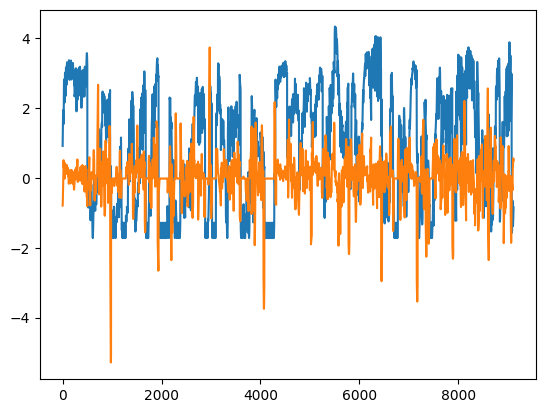

In [ ]:
#insertion 4, stimulus, time_window = np.array([-0.2, 1])  # 30 ms after the event #longer time 200-300ms, 20-30
#same A for all trails, avg all trial, one object func to learn A fir all trials, infer z for each trial
#cross valivadation currently, keep z 1 or 2
plt.plot(sessionTrain.z)  # Draw the result

In [ ]:
plot_trajectories2L(z_train, choice[:num_train], accuracy[:num_train], 1.2/20 * 1000)

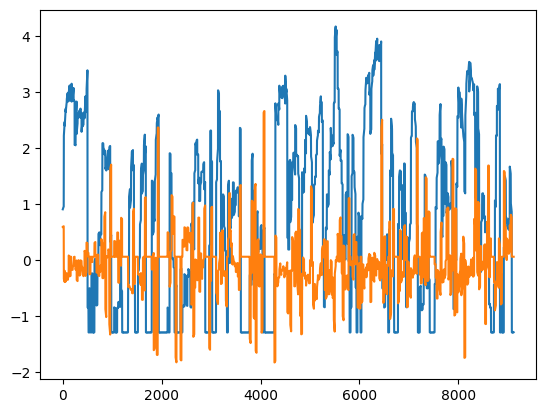

In [ ]:
#insertion 4, stimulus, time_window = np.array([0, 0.3])  # 30 ms after the event #longer time 200-300ms, 20-30
#same A for all trails, avg all trial, one object func to learn A fir all trials, infer z for each trial
#cross valivadation currently, keep z 1 or 2
plt.plot(sessionTrain.z)  # Draw the result

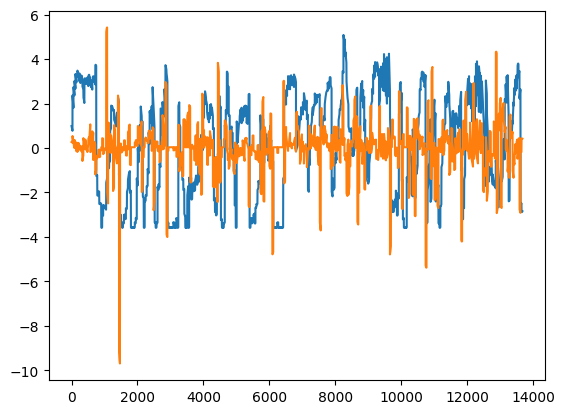

In [ ]:
#insertion 4, stimulus, time_window = np.array([0, 3])  # 300 ms after the event #longer time 200-300ms, 20-30
#same A for all trails, avg all trial, one object func to learn A fir all trials, infer z for each trial
#cross valivadation currently, keep z 1 or 2
plt.plot(sessionTrain.z)  # Draw the result

In [ ]:
import numpy as np
import pandas as pd
import os

#to do:check their quality
def filter_spikes(spikes, clusters, quality=0.5, region = 'STR'):#region = 'MOs5'):#'HIP'):#region='MO'):#region = 'STR'):#region='MO'):
#def filter_spikes(spikes, clusters, quality=1, region = 'STR'):
    good_clusterIDs = clusters['cluster_id'][((clusters['label'] > quality)) & ([True if region in s else False for s in clusters['acronym']])]
    good_spikes_loc = np.isin(spikes['clusters'], good_clusterIDs) # Boolean array of whether a spike is in a good cluster

    good_spikes = {}
    for i in spikes:
        good_spikes[i] = spikes[i][good_spikes_loc]

    return good_spikes

#def bin_spikes(spikes, trials, ROOT_DIR, exp_name, bin_size=50e-3, save=False):
#exp_name: the name of the exported file
def bin_spikes(spikes, trials, bin_size= 0.1): #0.05): #50e-3):
    df = pd.DataFrame(data = {'clusters':spikes['clusters'], 'times':spikes['times']})
    df = df.groupby('clusters')['times'].apply(np.array) # Neurons x Spike Times

    bin_data = []
    goCue_times = []
    firstMove_times = []
    choices = []
    accuracy = []

    for i in range(len(trials['goCueTrigger_times'])):
        # Mouse must have a miniumum 50 ms reaction time for us to consider the trial.
        if (trials['firstMovement_times'][i] < trials['goCue_times'][i]+0.05): #if the mouse move so early, not enough reaction time, not valid #time the sound is sent
            continue
        elif ((np.isnan(trials['goCue_times'][i])) | (np.isnan(trials['firstMovement_times'][i]))):
            continue

        goCue_times.append(trials['goCue_times'][i])
        firstMove_times.append(trials['firstMovement_times'][i])
        choices.append(trials['choice'][i])
        accuracy.append(trials['feedbackType'][i])

        x = []
        #hist_bins = np.arange(trials['firstMovement_times'][i]-0.1, trials['firstMovement_times'][i]+1.00001, bin_size)
        hist_bins = np.arange(trials['firstMovement_times'][i], trials['firstMovement_times'][i]+2, bin_size)


        for j in df: # Iterate through spike times of each cluster
            #inds = ((j>(trials['firstMovement_times'][i]-0.1)) & (j<=(trials['firstMovement_times'][i]+1.00001)))
            inds = ((j>(trials['firstMovement_times'][i])) & (j<=(trials['firstMovement_times'][i]+2)))
            x.append(np.histogram(j[inds], hist_bins)[0])

        spikes_df = pd.DataFrame(x, index=df.index)
        bin_data.append(spikes_df)

    # if save:
    #     np.save(os.path.join(ROOT_DIR, 'data', 'out', exp_name, 'bin_data.npy'), bin_data)
    #     np.savetxt(os.path.join(ROOT_DIR, 'data', 'out', exp_name, 'goCue_times.csv'), goCue_times, delimiter=',')
    #     np.savetxt(os.path.join(ROOT_DIR, 'data', 'out', exp_name, 'firstMove_times.csv'), firstMove_times, delimiter=',')
    #     np.savetxt(os.path.join(ROOT_DIR, 'data', 'out', exp_name, 'choices.csv'), choices, delimiter=',')
    #     np.savetxt(os.path.join(ROOT_DIR, 'data', 'out', exp_name, 'accuracy.csv'), accuracy, delimiter=',')

    return np.array(bin_data), goCue_times, firstMove_times, choices, accuracy

def class_data(z, choices, accuracy, time_significance):
    X = z[:, time_significance, :]
    y = []

    for i in range(len(choices)):
        if ((choices[i]==1) & (accuracy[i]==1)):
            y.append(0)
        elif ((choices[i]==-1) & (accuracy[i]==1)):
            y.append(1)
        elif ((choices[i]==1) & (accuracy[i]==-1)):
            y.append(2)
        elif ((choices[i]==-1) & (accuracy[i]==-1)):
            y.append(3)

    return np.array(X), np.array(y)

In [ ]:
2/0.05

40.0

In [ ]:
# Instanciate the ONE cache
from pathlib import Path
ibl_cache = Path.home() / 'Downloads' / 'IBL_Cache'
ibl_cache.mkdir(exist_ok=True, parents=True)

In [ ]:
pw = 'international'
one = ONE(base_url='https://openalyx.internationalbrainlab.org', password=pw, silent=True,
          cache_dir=ibl_cache, mode = 'remote')
          #cache_dir=os.path.join(ROOT_DIR, 'data', 'raw', 'ONE'), mode='local')
# Our STR
# acronym = 'HIP'#'STR'
# insertions = one.search_insertions(atlas_acronym=acronym, query_type='remote')

# Select your PID
pid = insertions[23]#[4]#[3]#[43] #10

# # ---------------------------------------------------
# # Convert probe PID to session EID and probe name
[eid, pname] = one.pid2eid(pid)

#eid = 'ebe2efe3-e8a1-451a-8947-76ef42427cc9'

# Load data
sl = SpikeSortingLoader(one=one, eid=eid, pname=pname)
#sl = SpikeSortingLoader(one=one, eid=config['eid'], pname=config['probe_name'])
spikes, clusters, channels = sl.load_spike_sorting()
clusters = sl.merge_clusters(spikes, clusters, channels)
trials = one.load_object(eid, 'trials', collection='alf')

In [ ]:
spikes_cleaned = filter_spikes(spikes, clusters)

In [ ]:
bin_data, goCue_times, firstMove_times, choices, accuracy = bin_spikes(spikes_cleaned, trials)

In [ ]:
bin_data.shape

(400, 107, 19)

In [ ]:
bin_data.shape #2

(395, 73, 19)

In [ ]:
bin_data.shape[0]

538

In [ ]:
num_train = int(bin_data.shape[0]*0.75)

In [ ]:
bin_data[0].shape[1]

19

In [ ]:
#FPR2/3
sessionTrain = Session(0.1)#50e-3)
for i in range(num_train):
    sessionTrain.add_trial(i, y=bin_data[i].T)

sessionTest = Session(0.1)#(50e-3)
for i in range(num_train, len(bin_data)):
    sessionTest.add_trial(i, y=bin_data[i].T)

# Build and Train Latent Variable Model
kernel = RBF(scale=1, lengthscale= 0.3)#200e-3)
sessionTrain, params = vi.fit(sessionTrain, n_factors=2, kernel=kernel, seed=10, max_iter=50)#, trial_length=bin_data[0].shape[1], GPFA=True)
z_train = rearrange(sessionTrain.z, '(trials time) lat -> trials time lat', time=bin_data[0].shape[1])

# Infer latents of test data
sessionTest = vi.infer(sessionTest, params=params)
z_test = rearrange(sessionTest.z, '(trials time) lat -> trials time lat', time=bin_data[0].shape[1])

# Plot Training trajectories
plot_trajectories2L(z_train, choices[:num_train], accuracy[:num_train], 0.1 *1000)

In [ ]:
#FPR2/3
sessionTrain = Session(0.1)#50e-3)
for i in range(num_train):
    sessionTrain.add_trial(i, y=bin_data[i].T)

sessionTest = Session(0.1)#(50e-3)
for i in range(num_train, len(bin_data)):
    sessionTest.add_trial(i, y=bin_data[i].T)

# Build and Train Latent Variable Model
kernel = RBF(scale=1, lengthscale= 0.3)#200e-3)
sessionTrain, params = vi.fit(sessionTrain, n_factors=2, kernel=kernel, seed=10, max_iter=50)#, trial_length=bin_data[0].shape[1], GPFA=True)
z_train = rearrange(sessionTrain.z, '(trials time) lat -> trials time lat', time=bin_data[0].shape[1])

# Infer latents of test data
sessionTest = vi.infer(sessionTest, params=params)
z_test = rearrange(sessionTest.z, '(trials time) lat -> trials time lat', time=bin_data[0].shape[1])

# Plot Training trajectories
plot_trajectories2L(z_train, choices[:num_train], accuracy[:num_train], 0.1 *1000)

Initializing
Initialized


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:267: UserWarning:

M: loss increased

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning:

E: loss increased

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning:

E: maximum number of iterations reached



EM Iteration 1, 	Loss = 535.7138, 	M step: 3.12s, 	E step: 1.26s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:277: UserWarning:

M: maximum number of iterations reached



EM Iteration 2, 	Loss = 126.9998, 	M step: 3.57s, 	E step: 3.14s
EM Iteration 3, 	Loss = 13.7526, 	M step: 2.39s, 	E step: 1.24s
EM Iteration 4, 	Loss = 14.7455, 	M step: 2.18s, 	E step: 1.25s
Inferring
Trial 0, 	Loss = 35.3692
Trial 1, 	Loss = 11.6403
Trial 2, 	Loss = 15.9773
Trial 3, 	Loss = 12.9727
Trial 4, 	Loss = 56120.0261
Trial 5, 	Loss = 13.5723
Trial 6, 	Loss = 11.4803
Trial 7, 	Loss = 13.1741
Trial 8, 	Loss = 6.9643
Trial 9, 	Loss = 12.3263
Trial 10, 	Loss = 9.5313
Trial 11, 	Loss = 6.8920
Trial 12, 	Loss = 9.0531
Trial 13, 	Loss = 12.0954
Trial 14, 	Loss = 6.3894
Trial 15, 	Loss = 13.3940
Trial 16, 	Loss = 12.7166
Trial 17, 	Loss = 7.8242
Trial 18, 	Loss = 8.6000
Trial 19, 	Loss = 9.0131
Trial 20, 	Loss = 12.8737


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:405: UserWarning:

EM: loss increased



Trial 21, 	Loss = 12.2898
Trial 22, 	Loss = 19.0475
Trial 23, 	Loss = 11.6258
Trial 24, 	Loss = 12.1140
Trial 25, 	Loss = 12.8371
Trial 26, 	Loss = 13.4236
Trial 27, 	Loss = 19.4761
Trial 28, 	Loss = 13.6753
Trial 29, 	Loss = 14.0804
Trial 30, 	Loss = 15.7240
Trial 31, 	Loss = 13.8090
Trial 32, 	Loss = 12.8538
Trial 33, 	Loss = 13.2545
Trial 34, 	Loss = 10.2180
Trial 35, 	Loss = 15.8814
Trial 36, 	Loss = 11.8421
Trial 37, 	Loss = 15.0615
Trial 38, 	Loss = 11.9344
Trial 39, 	Loss = 13.7803
Trial 40, 	Loss = 13.7875
Trial 41, 	Loss = 17.3189
Trial 42, 	Loss = 12.4589
Trial 43, 	Loss = 16.3537
Trial 44, 	Loss = 9.7257
Trial 45, 	Loss = 10.4793
Trial 46, 	Loss = 11.7513
Trial 47, 	Loss = 21.7772
Trial 48, 	Loss = 14.2376
Trial 49, 	Loss = 14.7568
Trial 50, 	Loss = 14.6735
Trial 51, 	Loss = 14.1272
Trial 52, 	Loss = 16.8827
Trial 53, 	Loss = 13.3416
Trial 54, 	Loss = 16.3316
Trial 55, 	Loss = 10.5980
Trial 56, 	Loss = 12.5862
Trial 57, 	Loss = 14.8829
Trial 58, 	Loss = 12.1171
Trial 59, 	Lo

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning:

E: loss increased



Trial 315, 	Loss = 13.1411
Trial 316, 	Loss = 15.3381
Trial 317, 	Loss = 14.8904
Trial 318, 	Loss = 13.0431
Trial 319, 	Loss = 13.4550
Trial 320, 	Loss = 14.5116
Trial 321, 	Loss = 14.4100
Trial 322, 	Loss = 11.5782
Trial 323, 	Loss = 12.9634
Trial 324, 	Loss = 14.3240
Trial 325, 	Loss = 11.6046
Trial 326, 	Loss = 14.3203
Trial 327, 	Loss = 13.3721
Trial 328, 	Loss = 11.6543
Trial 329, 	Loss = 13.2428
Trial 330, 	Loss = 15.0183
Trial 331, 	Loss = 11.9112
Trial 332, 	Loss = 12.3919
Trial 333, 	Loss = 14.9695
Trial 334, 	Loss = 15.0875
Trial 335, 	Loss = 11.8098
Trial 336, 	Loss = 10.4931
Trial 337, 	Loss = 13.4559
Trial 338, 	Loss = 13.6704
Trial 339, 	Loss = 11.9088
Trial 340, 	Loss = 15.8773
Trial 341, 	Loss = 11.1436
Trial 342, 	Loss = 14.2941
Trial 343, 	Loss = 17.4974
Trial 344, 	Loss = 13.6764
Trial 345, 	Loss = 16.6459
Trial 346, 	Loss = 17.5698
Trial 347, 	Loss = 17.3286
Trial 348, 	Loss = 15.1380
Trial 349, 	Loss = 12.1359
Trial 350, 	Loss = 12.3583
Trial 351, 	Loss = 16.1826
T

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning:

E: maximum number of iterations reached



Trial 390, 	Loss = 33.1941
Trial 391, 	Loss = 23.2437
Trial 392, 	Loss = 14.3175
Trial 393, 	Loss = 21.3246
Trial 394, 	Loss = 21.0560


In [ ]:
#FRP all
sessionTrain = Session(50e-3)
for i in range(num_train):
    sessionTrain.add_trial(i, y=bin_data[i].T)

sessionTest = Session(50e-3)
for i in range(num_train, len(bin_data)):
    sessionTest.add_trial(i, y=bin_data[i].T)

# Build and Train Latent Variable Model
kernel = RBF(scale=1, lengthscale= 200e-3)
sessionTrain, params = vi.fit(sessionTrain, n_factors=2, kernel=kernel, seed=10, max_iter=50, trial_length=20, GPFA=True)
z_train = rearrange(sessionTrain.z, '(trials time) lat -> trials time lat', time=bin_data[0].shape[1])

# Infer latents of test data
sessionTest = vi.infer(sessionTest, params=params)
z_test = rearrange(sessionTest.z, '(trials time) lat -> trials time lat', time=bin_data[0].shape[1])

# Plot Training trajectories
plot_trajectories2L(z_train, choices[:num_train], accuracy[:num_train], 50e-3 *1000)

Initializing
Initialized


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:267: UserWarning:

M: loss increased

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning:

E: loss increased



EM Iteration 1, 	Loss = 70.3978, 	M step: 12.03s, 	E step: 4.39s
EM Iteration 2, 	Loss = 68.8013, 	M step: 12.14s, 	E step: 3.13s
EM Iteration 3, 	Loss = 68.7363, 	M step: 11.14s, 	E step: 2.93s
EM Iteration 4, 	Loss = 68.7029, 	M step: 11.96s, 	E step: 3.88s
EM Iteration 5, 	Loss = 68.6808, 	M step: 13.68s, 	E step: 2.93s
EM Iteration 6, 	Loss = 68.6664, 	M step: 16.95s, 	E step: 3.67s
EM Iteration 7, 	Loss = 70.7463, 	M step: 11.58s, 	E step: 3.66s
Inferring
Trial 0, 	Loss = 86.8593
Trial 1, 	Loss = 89.1834
Trial 2, 	Loss = 72.3891
Trial 3, 	Loss = 89.4957
Trial 4, 	Loss = 73.8943
Trial 5, 	Loss = 185.0197
Trial 6, 	Loss = 80.3807
Trial 7, 	Loss = 76.0871
Trial 8, 	Loss = 62.7051
Trial 9, 	Loss = 68.6482
Trial 10, 	Loss = 124.6413
Trial 11, 	Loss = 70.7271
Trial 12, 	Loss = 71.4178
Trial 13, 	Loss = 62.7700
Trial 14, 	Loss = 72.1295
Trial 15, 	Loss = 68.6353


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:405: UserWarning:

EM: loss increased



Trial 16, 	Loss = 62.4488
Trial 17, 	Loss = 74.5453
Trial 18, 	Loss = 54.4043
Trial 19, 	Loss = 63.1236
Trial 20, 	Loss = 63.6667
Trial 21, 	Loss = 56.5607
Trial 22, 	Loss = 60.3433
Trial 23, 	Loss = 71.6660
Trial 24, 	Loss = 388.9821
Trial 25, 	Loss = 65.4279
Trial 26, 	Loss = 805.9971
Trial 27, 	Loss = 54.3865
Trial 28, 	Loss = 57.7137
Trial 29, 	Loss = 1125.9097
Trial 30, 	Loss = 5738.6726
Trial 31, 	Loss = 69.0445
Trial 32, 	Loss = 10821.4339
Trial 33, 	Loss = 61.7190
Trial 34, 	Loss = 7757.6722
Trial 35, 	Loss = 10556.0603
Trial 36, 	Loss = 57.4985
Trial 37, 	Loss = 63.7926
Trial 38, 	Loss = 1690.5156
Trial 39, 	Loss = 73.4000
Trial 40, 	Loss = 66.5858
Trial 41, 	Loss = 2752.7609
Trial 42, 	Loss = 2545.0516
Trial 43, 	Loss = 457.4809
Trial 44, 	Loss = 9419.2848
Trial 45, 	Loss = 2099.7160
Trial 46, 	Loss = 1315.7389
Trial 47, 	Loss = 118.9364
Trial 48, 	Loss = 942.1573
Trial 49, 	Loss = 94.3719
Trial 50, 	Loss = 63.8883
Trial 51, 	Loss = 62.3320
Trial 52, 	Loss = 144.3689
Trial 53

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning:

E: loss increased



Trial 419, 	Loss = 84.3108
Trial 420, 	Loss = 79.9408
Trial 421, 	Loss = 80.9161
Trial 422, 	Loss = 79.2642
Trial 423, 	Loss = 89.7083
Trial 424, 	Loss = 79.6818
Trial 425, 	Loss = 80.8533
Trial 426, 	Loss = 84.7021
Trial 427, 	Loss = 91.2214
Trial 428, 	Loss = 85.0168
Trial 429, 	Loss = 79.1846
Trial 430, 	Loss = 79.0234
Trial 431, 	Loss = 81.0888
Trial 432, 	Loss = 72.4961
Trial 433, 	Loss = 76.4126
Trial 434, 	Loss = 75.6737
Trial 435, 	Loss = 75.4714
Trial 436, 	Loss = 76.6036
Trial 437, 	Loss = 80.5689
Trial 438, 	Loss = 77.1506
Trial 439, 	Loss = 84.3501
Trial 440, 	Loss = 88.4785
Trial 441, 	Loss = 76.1863
Trial 442, 	Loss = 88.2903
Trial 443, 	Loss = 83.8030
Trial 444, 	Loss = 80.3992
Trial 445, 	Loss = 81.7443
Trial 446, 	Loss = 79.0451
Trial 447, 	Loss = 77.6864
Trial 448, 	Loss = 72.7776
Trial 449, 	Loss = 74.9753
Trial 450, 	Loss = 87.4512
Trial 451, 	Loss = 72.7669
Trial 452, 	Loss = 71.3923
Trial 453, 	Loss = 74.7713
Trial 454, 	Loss = 80.4156
Trial 455, 	Loss = 87.4193
T

In [ ]:
#MO
sessionTrain = Session(50e-3)
for i in range(num_train):
    sessionTrain.add_trial(i, y=bin_data[i].T)

sessionTest = Session(50e-3)
for i in range(num_train, len(bin_data)):
    sessionTest.add_trial(i, y=bin_data[i].T)

# Build and Train Latent Variable Model
kernel = RBF(scale=1, lengthscale= 200e-3)
sessionTrain, params = vi.fit(sessionTrain, n_factors=2, kernel=kernel, seed=10, max_iter=50, trial_length=20, GPFA=True)
z_train = rearrange(sessionTrain.z, '(trials time) lat -> trials time lat', time=bin_data[0].shape[1])

# Infer latents of test data
sessionTest = vi.infer(sessionTest, params=params)
z_test = rearrange(sessionTest.z, '(trials time) lat -> trials time lat', time=bin_data[0].shape[1])

# Plot Training trajectories
plot_trajectories2L(z_train, choices[:num_train], accuracy[:num_train], 50e-3 *1000)

Initializing
Initialized


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning:

E: loss increased



EM Iteration 1, 	Loss = 27.5377, 	M step: 6.02s, 	E step: 4.61s
EM Iteration 2, 	Loss = 27.2080, 	M step: 3.46s, 	E step: 2.71s
EM Iteration 3, 	Loss = 27.1481, 	M step: 1.70s, 	E step: 3.19s
EM Iteration 4, 	Loss = 27.1138, 	M step: 2.35s, 	E step: 2.86s
EM Iteration 5, 	Loss = 27.0918, 	M step: 1.68s, 	E step: 2.81s
EM Iteration 6, 	Loss = 27.0773, 	M step: 1.69s, 	E step: 3.82s
EM Iteration 7, 	Loss = 27.0680, 	M step: 1.73s, 	E step: 2.85s
EM Iteration 8, 	Loss = 27.0626, 	M step: 1.65s, 	E step: 3.01s
EM Iteration 9, 	Loss = 27.0599, 	M step: 2.67s, 	E step: 2.86s
EM Iteration 10, 	Loss = 27.0595, 	M step: 1.70s, 	E step: 2.90s
EM Iteration 11, 	Loss = 27.0608, 	M step: 1.72s, 	E step: 3.91s
Inferring


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:405: UserWarning:

EM: loss increased



Trial 0, 	Loss = 33.4994
Trial 1, 	Loss = 31.0994
Trial 2, 	Loss = 30.1365
Trial 3, 	Loss = 24.2579
Trial 4, 	Loss = 26.0474
Trial 5, 	Loss = 28.6344
Trial 6, 	Loss = 22.8028
Trial 7, 	Loss = 25.2083
Trial 8, 	Loss = 27.7979
Trial 9, 	Loss = 21.6041
Trial 10, 	Loss = 23.6087
Trial 11, 	Loss = 24.3671
Trial 12, 	Loss = 25.5301
Trial 13, 	Loss = 21.7971
Trial 14, 	Loss = 25.7943
Trial 15, 	Loss = 24.5125
Trial 16, 	Loss = 24.4163
Trial 17, 	Loss = 24.1858
Trial 18, 	Loss = 24.9888
Trial 19, 	Loss = 20.0782
Trial 20, 	Loss = 20.9481


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning:

E: maximum number of iterations reached



Trial 21, 	Loss = 16.0774
Trial 22, 	Loss = 20.6468
Trial 23, 	Loss = 27.3174
Trial 24, 	Loss = 21.6761
Trial 25, 	Loss = 22.1415
Trial 26, 	Loss = 23.0928
Trial 27, 	Loss = 23.9515
Trial 28, 	Loss = 21.7924
Trial 29, 	Loss = 21.7241
Trial 30, 	Loss = 21.1113
Trial 31, 	Loss = 22.3209
Trial 32, 	Loss = 27.4041
Trial 33, 	Loss = 20.4953
Trial 34, 	Loss = 30.5931
Trial 35, 	Loss = 20.6352
Trial 36, 	Loss = 20.6863
Trial 37, 	Loss = 28.0442
Trial 38, 	Loss = 23.5489
Trial 39, 	Loss = 23.2854
Trial 40, 	Loss = 20.1730
Trial 41, 	Loss = 18.3345
Trial 42, 	Loss = 31.4727
Trial 43, 	Loss = 21.6686
Trial 44, 	Loss = 23.1198
Trial 45, 	Loss = 25.5450
Trial 46, 	Loss = 24.9950
Trial 47, 	Loss = 21.7417
Trial 48, 	Loss = 19.4219
Trial 49, 	Loss = 23.4538
Trial 50, 	Loss = 20.6422
Trial 51, 	Loss = 17.8896
Trial 52, 	Loss = 24.6051
Trial 53, 	Loss = 25.2755
Trial 54, 	Loss = 29.6681
Trial 55, 	Loss = 19.9045
Trial 56, 	Loss = 19.5782
Trial 57, 	Loss = 21.3001
Trial 58, 	Loss = 22.0783
Trial 59, 	L

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning:

E: loss increased



In [ ]:
bin_data.shape

(400, 107, 19)

In [ ]:
num_train = int(bin_data.shape[0]*0.75)

In [ ]:
#STR
sessionTrain = Session(dt)
for i in range(num_train):
    sessionTrain.add_trial(i, y=bin_data[i].T)

sessionTest = Session(dt)
for i in range(num_train, len(bin_data)):
    sessionTest.add_trial(i, y=bin_data[i].T)

# Build and Train Latent Variable Model
kernel = RBF(scale=1, lengthscale= dt*10) #try to learn lengthscale, there's a way to learn ot in the model, cross validation, learned along other parameters
sessionTrain, params = vi.fit(sessionTrain, n_factors=2, kernel=kernel, seed=10, max_iter=50, trial_length=19)#, GPFA=True)
z_train = rearrange(sessionTrain.z, '(trials time) lat -> trials time lat', time=bin_data[0].shape[1])

# Infer latents of test data
sessionTest = vi.infer(sessionTest, params=params)
z_test = rearrange(sessionTest.z, '(trials time) lat -> trials time lat', time=bin_data[0].shape[1])

# Plot Training trajectories
plot_trajectories2L(z_train, choices[:num_train], accuracy[:num_train], 2/20 *1000)

#sorted by easiest trial time, max stimulus contract to the left/ right,
#signal related to movement & related to the perception of the stimulus
#looked at the most obvious diff

Initializing
Initialized


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:267: UserWarning:

M: loss increased



EM Iteration 1, 	Loss = 39.0924, 	M step: 4.49s, 	E step: 1.90s
EM Iteration 2, 	Loss = 38.0546, 	M step: 3.72s, 	E step: 0.64s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning:

E: loss increased



EM Iteration 3, 	Loss = 37.9871, 	M step: 2.47s, 	E step: 0.72s
EM Iteration 4, 	Loss = 37.9425, 	M step: 3.55s, 	E step: 0.85s
EM Iteration 5, 	Loss = 37.9078, 	M step: 2.47s, 	E step: 0.80s
EM Iteration 6, 	Loss = 37.8794, 	M step: 2.47s, 	E step: 0.83s
EM Iteration 7, 	Loss = 37.8556, 	M step: 2.53s, 	E step: 1.27s
EM Iteration 8, 	Loss = 37.8354, 	M step: 3.21s, 	E step: 0.84s
EM Iteration 9, 	Loss = 37.8184, 	M step: 2.53s, 	E step: 0.88s
EM Iteration 10, 	Loss = 40.7573, 	M step: 2.52s, 	E step: 0.82s
Inferring
Trial 0, 	Loss = 37.9456
Trial 1, 	Loss = 38.3329
Trial 2, 	Loss = 35.3465
Trial 3, 	Loss = 36.1788
Trial 4, 	Loss = 38.8987
Trial 5, 	Loss = 37.1020
Trial 6, 	Loss = 38.8561
Trial 7, 	Loss = 38.4274
Trial 8, 	Loss = 36.3257
Trial 9, 	Loss = 39.6438
Trial 10, 	Loss = 34.9674
Trial 11, 	Loss = 38.1295
Trial 12, 	Loss = 37.4788
Trial 13, 	Loss = 37.4459
Trial 14, 	Loss = 37.2042
Trial 15, 	Loss = 37.6326
Trial 16, 	Loss = 38.5393
Trial 17, 	Loss = 36.8957
Trial 18, 	Loss = 3

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:405: UserWarning:

EM: loss increased



Trial 19, 	Loss = 39.3887
Trial 20, 	Loss = 38.2970
Trial 21, 	Loss = 41.0632
Trial 22, 	Loss = 38.2887
Trial 23, 	Loss = 39.8934
Trial 24, 	Loss = 41.7815
Trial 25, 	Loss = 40.4219
Trial 26, 	Loss = 38.6487
Trial 27, 	Loss = 40.8904
Trial 28, 	Loss = 40.5575
Trial 29, 	Loss = 39.4954
Trial 30, 	Loss = 42.9860
Trial 31, 	Loss = 36.3500
Trial 32, 	Loss = 38.1707
Trial 33, 	Loss = 38.0913
Trial 34, 	Loss = 38.1126
Trial 35, 	Loss = 39.7978
Trial 36, 	Loss = 38.4216
Trial 37, 	Loss = 40.3431
Trial 38, 	Loss = 36.0820
Trial 39, 	Loss = 36.9217
Trial 40, 	Loss = 38.2292
Trial 41, 	Loss = 36.9990
Trial 42, 	Loss = 38.0125
Trial 43, 	Loss = 38.6062
Trial 44, 	Loss = 41.3514
Trial 45, 	Loss = 39.6277
Trial 46, 	Loss = 38.5200
Trial 47, 	Loss = 38.6106
Trial 48, 	Loss = 41.8130
Trial 49, 	Loss = 36.3361
Trial 50, 	Loss = 38.7047
Trial 51, 	Loss = 36.2779
Trial 52, 	Loss = 36.7231
Trial 53, 	Loss = 38.1441
Trial 54, 	Loss = 38.2336
Trial 55, 	Loss = 36.9583
Trial 56, 	Loss = 40.2076
Trial 57, 	L

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning:

E: maximum number of iterations reached



Trial 300, 	Loss = 37.7082
Trial 301, 	Loss = 36.7215
Trial 302, 	Loss = 42.3965
Trial 303, 	Loss = 46.9129
Trial 304, 	Loss = 39.1405
Trial 305, 	Loss = 39.0733
Trial 306, 	Loss = 36.6784
Trial 307, 	Loss = 36.0838
Trial 308, 	Loss = 37.3671
Trial 309, 	Loss = 35.6958
Trial 310, 	Loss = 39.7938
Trial 311, 	Loss = 36.1659
Trial 312, 	Loss = 39.9041
Trial 313, 	Loss = 37.7647
Trial 314, 	Loss = 37.6812
Trial 315, 	Loss = 41.4582
Trial 316, 	Loss = 36.3424


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning:

E: loss increased



Trial 317, 	Loss = 38.3528
Trial 318, 	Loss = 36.0909
Trial 319, 	Loss = 38.6982
Trial 320, 	Loss = 36.8311
Trial 321, 	Loss = 40.5242
Trial 322, 	Loss = 43.6880
Trial 323, 	Loss = 40.2090
Trial 324, 	Loss = 41.3901
Trial 325, 	Loss = 35.9034
Trial 326, 	Loss = 41.1702
Trial 327, 	Loss = 40.0621
Trial 328, 	Loss = 1357.0127
Trial 329, 	Loss = 39.0300
Trial 330, 	Loss = 38.6789
Trial 331, 	Loss = 926.8463
Trial 332, 	Loss = 40.8621
Trial 333, 	Loss = 40.3433
Trial 334, 	Loss = 936.5576
Trial 335, 	Loss = 38.3727
Trial 336, 	Loss = 45.2356
Trial 337, 	Loss = 41.1611
Trial 338, 	Loss = 936.0157
Trial 339, 	Loss = 927.1908
Trial 340, 	Loss = 40.6059
Trial 341, 	Loss = 46.5630
Trial 342, 	Loss = 36.7665
Trial 343, 	Loss = 35.4654
Trial 344, 	Loss = 39.4957
Trial 345, 	Loss = 932.3325
Trial 346, 	Loss = 41.8010
Trial 347, 	Loss = 37.8396
Trial 348, 	Loss = 36.5399
Trial 349, 	Loss = 934.7894
Trial 350, 	Loss = 39.2770
Trial 351, 	Loss = 935.8799
Trial 352, 	Loss = 36.7196
Trial 353, 	Loss = 

In [ ]:
#STR
sessionTrain = Session(dt)
for i in range(num_train):
    sessionTrain.add_trial(i, y=bin_data[i].T)

sessionTest = Session(dt)
for i in range(num_train, len(bin_data)):
    sessionTest.add_trial(i, y=bin_data[i].T)

# Build and Train Latent Variable Model
kernel = RBF(scale=1, lengthscale= dt*10) #try to learn lengthscale
sessionTrain, params = vi.fit(sessionTrain, n_factors=2, kernel=kernel, seed=10, max_iter=50)#, trial_length=20, GPFA=True)
z_train = rearrange(sessionTrain.z, '(trials time) lat -> trials time lat', time=bin_data[0].shape[1])

# Infer latents of test data
sessionTest = vi.infer(sessionTest, params=params)
z_test = rearrange(sessionTest.z, '(trials time) lat -> trials time lat', time=bin_data[0].shape[1])

# Plot Training trajectories
plot_trajectories2L(z_train, choices[:num_train], accuracy[:num_train], 2/20 *1000)

Initializing
Initialized


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:267: UserWarning:

M: loss increased

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning:

E: loss increased



EM Iteration 1, 	Loss = 29.9124, 	M step: 26.57s, 	E step: 8.91s
EM Iteration 2, 	Loss = 29.3453, 	M step: 33.31s, 	E step: 6.50s
EM Iteration 3, 	Loss = 29.2973, 	M step: 24.16s, 	E step: 5.93s
EM Iteration 4, 	Loss = 29.2481, 	M step: 24.09s, 	E step: 7.37s
EM Iteration 5, 	Loss = 29.1753, 	M step: 23.60s, 	E step: 7.24s
EM Iteration 6, 	Loss = 29.0899, 	M step: 24.02s, 	E step: 10.85s
EM Iteration 7, 	Loss = 28.9693, 	M step: 26.71s, 	E step: 10.09s
EM Iteration 8, 	Loss = 29.3048, 	M step: 23.98s, 	E step: 11.81s
Inferring


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:405: UserWarning:

EM: loss increased



Trial 0, 	Loss = 26.9097
Trial 1, 	Loss = 26.1053
Trial 2, 	Loss = 28.1683
Trial 3, 	Loss = 24.0408
Trial 4, 	Loss = 21.8524
Trial 5, 	Loss = 24.2063
Trial 6, 	Loss = 26.0417
Trial 7, 	Loss = 24.8732
Trial 8, 	Loss = 20.6474
Trial 9, 	Loss = 25.0609
Trial 10, 	Loss = 23.4426
Trial 11, 	Loss = 23.0599
Trial 12, 	Loss = 24.7660
Trial 13, 	Loss = 25.7002
Trial 14, 	Loss = 24.4245
Trial 15, 	Loss = 24.7874
Trial 16, 	Loss = 25.2925
Trial 17, 	Loss = 22.6617
Trial 18, 	Loss = 25.5642
Trial 19, 	Loss = 25.7430
Trial 20, 	Loss = 24.6213
Trial 21, 	Loss = 27.9697
Trial 22, 	Loss = 24.4172
Trial 23, 	Loss = 23.7588
Trial 24, 	Loss = 27.0252
Trial 25, 	Loss = 25.7119
Trial 26, 	Loss = 23.2970
Trial 27, 	Loss = 25.2823
Trial 28, 	Loss = 24.8892


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning:

E: loss increased



Trial 29, 	Loss = 23.7546
Trial 30, 	Loss = 28.0405
Trial 31, 	Loss = 23.0255
Trial 32, 	Loss = 22.6467
Trial 33, 	Loss = 22.4556
Trial 34, 	Loss = 22.6508
Trial 35, 	Loss = 24.5544
Trial 36, 	Loss = 25.9855
Trial 37, 	Loss = 24.1988
Trial 38, 	Loss = 25.2022
Trial 39, 	Loss = 26.4631
Trial 40, 	Loss = 25.8667
Trial 41, 	Loss = 22.9216
Trial 42, 	Loss = 22.7286
Trial 43, 	Loss = 24.7832
Trial 44, 	Loss = 26.0434
Trial 45, 	Loss = 27.4442
Trial 46, 	Loss = 24.9261
Trial 47, 	Loss = 24.8774
Trial 48, 	Loss = 26.2510
Trial 49, 	Loss = 22.7987
Trial 50, 	Loss = 23.3952
Trial 51, 	Loss = 20.6373
Trial 52, 	Loss = 26.4994
Trial 53, 	Loss = 22.3872
Trial 54, 	Loss = 25.9030
Trial 55, 	Loss = 26.7404
Trial 56, 	Loss = 24.3165
Trial 57, 	Loss = 27.0270
Trial 58, 	Loss = 27.5088
Trial 59, 	Loss = 27.0704
Trial 60, 	Loss = 24.2699
Trial 61, 	Loss = 21.9748
Trial 62, 	Loss = 22.5597
Trial 63, 	Loss = 24.5092
Trial 64, 	Loss = 23.7431
Trial 65, 	Loss = 24.5721
Trial 66, 	Loss = 22.2420
Trial 67, 	L

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning:

E: loss increased



Trial 393, 	Loss = 22.8032
Trial 394, 	Loss = 29.7964
Trial 395, 	Loss = 25.6425
Trial 396, 	Loss = 25.9905
Trial 397, 	Loss = 28.1392
Trial 398, 	Loss = 26.0210
Trial 399, 	Loss = 41.5845


In [ ]:
def plot_trajectories2L(z, choices, accuracy, bin_size):
    first = True
    first2= True
    fig = go.Figure()

    for i in range(len(z)):
        if ((choices[i]==1) & (accuracy[i]==1)):
            if first:
                fig.add_trace(go.Scatter3d(x=np.arange(-100, 1000, bin_size), y=z[i][:, 0], z=z[i][:, 1],
                        mode='lines', line={'color':'blue', 'width':1}, legendgroup='right', name='Wheel Turned Right', showlegend=True))
                first = False
            else:
                fig.add_trace(go.Scatter3d(x=np.arange(-100, 1000, bin_size), y=z[i][:, 0], z=z[i][:, 1],
                            mode='lines', line={'color':'blue', 'width':1}, legendgroup='right', showlegend=False))

        elif ((choices[i]==-1) & (accuracy[i]==1)):
            if first2:
                fig.add_trace(go.Scatter3d(x=np.arange(-100, 1000, bin_size), y=z[i][:, 0], z=z[i][:, 1],
                        mode='lines', line={'color':'red', 'width':1}, legendgroup='left', name='Wheel Turned Left', showlegend=True))
                first2 = False
            else:
                fig.add_trace(go.Scatter3d(x=np.arange(-100, 1000, bin_size), y=z[i][:, 0], z=z[i][:, 1],
                            mode='lines', line={'color':'red', 'width':1}, legendgroup='left', showlegend=False))

        """
        Code below is if you wish to plot the trajectories when the mouse was incorrect
        """
        # elif ((training_trials[i]['choice']==1) & (training_trials[i]['feedbackType']==-1)):
        #     if first:
        #         fig = px.line_3d(x=np.arange(-0.1, 1, 0.05), y=z_test[i][:, 0], z=z_test[i][:, 1], color=["green"]*time_bins, width=800, height=800)
        #         first = False
        #     else:
        #         fig.add_scatter3d(x=np.arange(-0.1, 1, 0.05), y=z_test[i][:, 0], z=z_test[i][:, 1], mode='lines', line={'color':"green"}, opacity=0.5)

        # elif ((training_trials[i]['choice']==-1) & (training_trials[i]['feedbackType']==-1)):
        #     if first:
        #         fig = px.line_3d(x=np.arange(-0.1, 1, 0.05), y=z_test[i][:, 0], z=z_test[i][:, 1], color=["black"]*time_bins, width=800, height=800)
        #         first = False
        #     else:
        #         fig.add_scatter3d(x=np.arange(-0.1, 1, 0.05), y=z_test[i][:, 0], z=z_test[i][:, 1], mode='lines', line={'color':"black"}, opacity=1)
    fig.update_layout(scene = dict(
                    xaxis_title='Time (ms)',
                    yaxis_title='Latent Variable 1',
                    zaxis_title='Latent Variable 2'),
                    width=1000, height=1000, title='Latent Variables over Time'
                    )

    fig.show()

def class_plots(class0, class1, class1_labels, class2_labels, ROOT_DIR, exp_name, title, figname, save=True):
    plt.figure()
    plt.scatter(class0[:, 0], class0[:, 1], color='blue', label=class1_labels)
    plt.scatter(class1[:, 0], class1[:, 1], color='red', label=class2_labels)
    plt.xlabel('Latent Variable 1')
    plt.ylabel('Latent Variable 2')
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
#latent variable = 2
# %% Build the model
kernel = RBF(scale=1., lengthscale=100 * dt)  # RBF kernel
# key = jax.random.PRNGKey(0)
# kernel = RFF(key, 50, 1, scale=1., lengthscale=100 * dt)
session, params = vi.fit(session, n_factors=2, kernel=kernel, seed=random_seed, max_iter=50, trial_length= 2, GPFA=True) # trial_length=config['min_trial_length'], GPFA=True
# `fit` requires the target `session`, the number of factors `n_factors`, and the `kernel` function.
# `kernel` is a kernel function or a list of them corresponding to the factors.
# RBF kernel is implemented in `gp.kernel`. You may write your own kernels.


Initializing
Initialized


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


EM Iteration 1, 	Loss = 9.6083, 	M step: 29.24s, 	E step: 18.64s
EM Iteration 2, 	Loss = 9.4679, 	M step: 21.30s, 	E step: 18.40s
EM Iteration 3, 	Loss = 9.4302, 	M step: 21.43s, 	E step: 22.40s
EM Iteration 4, 	Loss = 9.4290, 	M step: 19.48s, 	E step: 23.16s
EM Iteration 5, 	Loss = 9.4422, 	M step: 20.28s, 	E step: 24.03s
Inferring


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:405: UserWarning: EM: loss increased
  warnings.warn('EM: loss increased')


Trial 1, 	Loss = -6.6246
Trial 2, 	Loss = -5.3502
Trial 3, 	Loss = -2.9441
Trial 4, 	Loss = -3.3284
Trial 5, 	Loss = -2.4909
Trial 6, 	Loss = -2.5304
Trial 7, 	Loss = 1.7872
Trial 8, 	Loss = 3.7576
Trial 9, 	Loss = -3.8066
Trial 10, 	Loss = -6.5012
Trial 11, 	Loss = -5.9450
Trial 12, 	Loss = -4.8915
Trial 13, 	Loss = -6.2958
Trial 14, 	Loss = -5.6483
Trial 15, 	Loss = -6.3344
Trial 16, 	Loss = -5.7661
Trial 17, 	Loss = -5.3070


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


Trial 18, 	Loss = -3.0484
Trial 19, 	Loss = -3.5952
Trial 20, 	Loss = -2.8041
Trial 21, 	Loss = -1.0212
Trial 22, 	Loss = -1.6644
Trial 23, 	Loss = -2.0365
Trial 24, 	Loss = -0.8624
Trial 25, 	Loss = 0.4245
Trial 26, 	Loss = -0.9705
Trial 27, 	Loss = 5.7024
Trial 28, 	Loss = 4.8101
Trial 29, 	Loss = 6.9582
Trial 30, 	Loss = 6.8005
Trial 31, 	Loss = 7.4094
Trial 32, 	Loss = 6.4436
Trial 33, 	Loss = 8.8660
Trial 34, 	Loss = 10.0748
Trial 35, 	Loss = 9.9904
Trial 36, 	Loss = 10.3749
Trial 37, 	Loss = 8.7267
Trial 38, 	Loss = 10.0631
Trial 39, 	Loss = 10.7058
Trial 40, 	Loss = 3.2075
Trial 41, 	Loss = 2.3678
Trial 42, 	Loss = 1.3214
Trial 43, 	Loss = 0.1525
Trial 44, 	Loss = -1.5212
Trial 45, 	Loss = 1.5148
Trial 46, 	Loss = 1.2877
Trial 47, 	Loss = 3.8984
Trial 48, 	Loss = 3.8265
Trial 49, 	Loss = 6.0738
Trial 50, 	Loss = 4.1481
Trial 51, 	Loss = 3.9491
Trial 52, 	Loss = 6.2880
Trial 53, 	Loss = -1.7824
Trial 54, 	Loss = -0.7086
Trial 55, 	Loss = -2.4874
Trial 56, 	Loss = -1.5314
Trial 57

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning: E: maximum number of iterations reached
  warnings.warn(f'E: maximum number of iterations reached')


Trial 277, 	Loss = -4.5767
Trial 278, 	Loss = -4.7825
Trial 279, 	Loss = -4.9154
Trial 280, 	Loss = -3.8265
Trial 281, 	Loss = -3.5823
Trial 282, 	Loss = -4.8566
Trial 283, 	Loss = -2.2218
Trial 284, 	Loss = -2.9324
Trial 285, 	Loss = -1.9667
Trial 286, 	Loss = 0.7206
Trial 287, 	Loss = -1.5350
Trial 288, 	Loss = 4.1980
Trial 289, 	Loss = 7.6554
Trial 290, 	Loss = 6.7111
Trial 291, 	Loss = 7.3067
Trial 292, 	Loss = 5.9049
Trial 293, 	Loss = 7.4638
Trial 294, 	Loss = 5.7446
Trial 295, 	Loss = 5.0539
Trial 296, 	Loss = 5.4379
Trial 297, 	Loss = 6.9530
Trial 298, 	Loss = 5.1794
Trial 299, 	Loss = 4.2967
Trial 300, 	Loss = 6.1474
Trial 301, 	Loss = 11.0053
Trial 302, 	Loss = 11.1052
Trial 303, 	Loss = 10.8140
Trial 304, 	Loss = 11.1457
Trial 305, 	Loss = 11.1022
Trial 306, 	Loss = 11.0777
Trial 307, 	Loss = 10.9639
Trial 308, 	Loss = 10.9627
Trial 309, 	Loss = 10.7977
Trial 310, 	Loss = 11.5956
Trial 311, 	Loss = 11.1937
Trial 312, 	Loss = 11.0120
Trial 313, 	Loss = 11.5895
Trial 314, 	Los

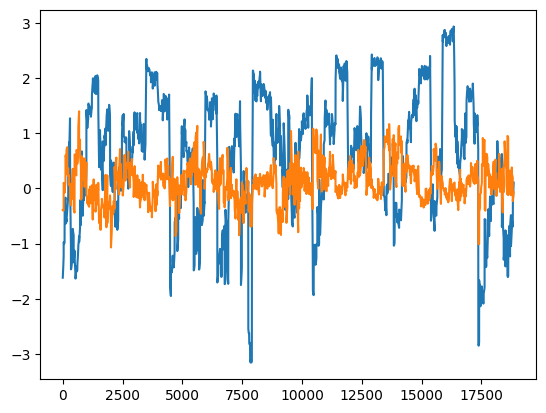

In [ ]:
#insertion 23, stimulus, time_window = np.array([0, 2])  # 200 ms before the event #longer time 200-300ms, 20-30
#same A for all trails, avg all trial, one object func to learn A fir all trials, infer z for each trial
#cross valivadation currently, keep z 1 or 2
plt.plot(session.z)  # Draw the result

(18848, 2)

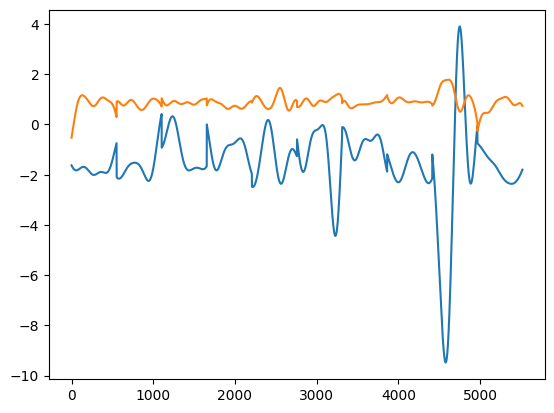

In [ ]:
#insertion 43, first movement, time_window = np.array([-0.1, 0.0])  # 100 ms before the event #longer time 200-300ms, 20-30
#same A for all trails, avg all trial, one object func to learn A fir all trials, infer z for each trial
#cross valivadation currently, keep z 1 or 2
plt.plot(session.z)  # Draw the result

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

In [ ]:
y.shape

(64, 5520)

In [ ]:
y_avg_cell = y.sum(axis = 0)/64

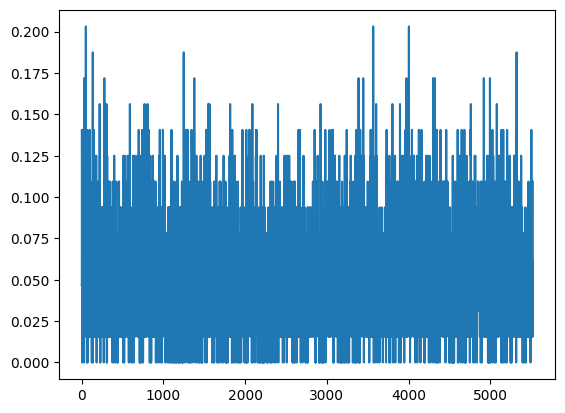

In [ ]:
plt.plot(y_avg_cell)

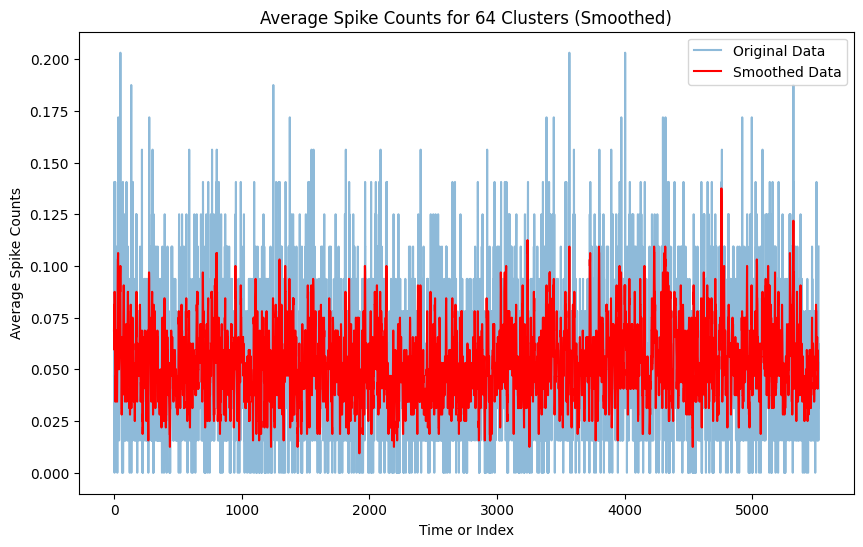

In [ ]:

# Assuming y is your spike count dataset with 64 clusters
# y_avg_cell = y.sum(axis = 0) / 64
# You already have y_avg_cell calculated

# Define a function for moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Smooth the data using a moving average
window_size = 5  # Adjust this value as needed for smoother or less smooth data
smoothed_y_avg_cell = moving_average(y_avg_cell, window_size)

# Adjust the x-axis (time or index) to match the length of the smoothed data
# Assuming you have a time array or an array of indices that matches y_avg_cell
time = np.arange(len(y_avg_cell))  # Replace or adjust if you have specific time data
adjusted_time = time[:len(smoothed_y_avg_cell)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, y_avg_cell, label='Original Data', alpha=0.5)
plt.plot(adjusted_time, smoothed_y_avg_cell, label='Smoothed Data', color='red')
plt.xlabel('Time or Index')
plt.ylabel('Average Spike Counts')
plt.title('Average Spike Counts for 64 Clusters (Smoothed)')
plt.legend()
plt.show()

In [ ]:
#latent variable = 1
# %% Build the model
kernel = RBF(scale=1., lengthscale=100 * dt)  # RBF kernel
# key = jax.random.PRNGKey(0)
# kernel = RFF(key, 50, 1, scale=1., lengthscale=100 * dt)
session, params = vi.fit(session, n_factors=1, kernel=kernel, seed=random_seed, max_iter=50)
# `fit` requires the target `session`, the number of factors `n_factors`, and the `kernel` function.
# `kernel` is a kernel function or a list of them corresponding to the factors.
# RBF kernel is implemented in `gp.kernel`. You may write your own kernels.

Initializing
Initialized
EM Iteration 1, 	Loss = 11.1170, 	M step: 2.37s, 	E step: 4.54s
EM Iteration 2, 	Loss = 11.1066, 	M step: 0.73s, 	E step: 2.15s
EM Iteration 3, 	Loss = 11.0990, 	M step: 1.02s, 	E step: 2.02s
EM Iteration 4, 	Loss = 11.0921, 	M step: 0.64s, 	E step: 1.71s
EM Iteration 5, 	Loss = 11.0859, 	M step: 0.67s, 	E step: 1.82s
EM Iteration 6, 	Loss = 11.0802, 	M step: 0.67s, 	E step: 1.87s
EM Iteration 7, 	Loss = 11.0750, 	M step: 0.69s, 	E step: 2.76s
EM Iteration 8, 	Loss = 11.0702, 	M step: 0.85s, 	E step: 1.67s
EM Iteration 9, 	Loss = 11.0658, 	M step: 0.61s, 	E step: 1.77s
EM Iteration 10, 	Loss = 11.0616, 	M step: 0.76s, 	E step: 1.80s
EM Iteration 11, 	Loss = 11.0578, 	M step: 0.64s, 	E step: 1.76s
EM Iteration 12, 	Loss = 11.0542, 	M step: 0.71s, 	E step: 2.86s
EM Iteration 13, 	Loss = 11.0509, 	M step: 0.71s, 	E step: 1.76s
EM Iteration 14, 	Loss = 11.0478, 	M step: 0.69s, 	E step: 1.79s
EM Iteration 15, 	Loss = 11.0449, 	M step: 0.73s, 	E step: 1.72s
EM Iterat

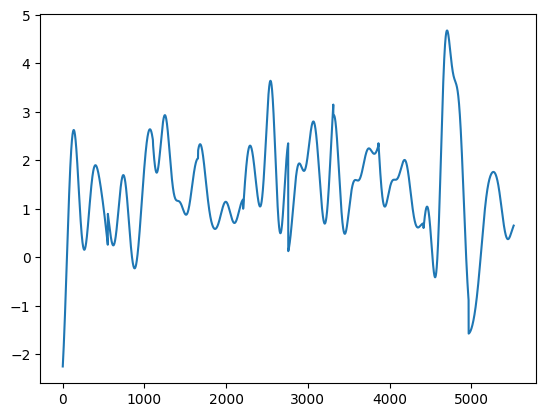

In [ ]:
plt.plot(session.z)

In [ ]:
#loop through, grid search to find the # of latent varibale with least loss

In [ ]:
y.T.shape

(5520, 64)

In [ ]:
y[:,:552].shape

(64, 552)

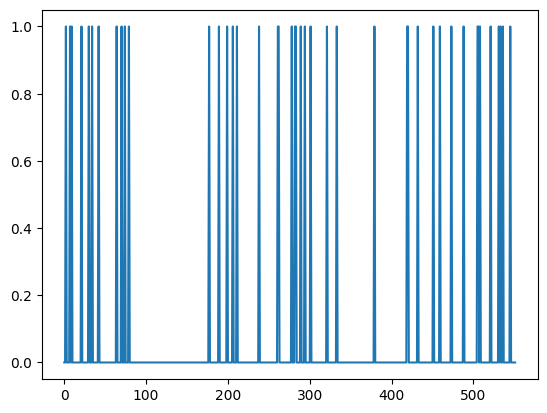

In [ ]:
plt.plot(y[1,:552].T)

In [ ]:
#latent variable = 2
# %% Build the model
kernel = RBF(scale=1., lengthscale=100 * dt)  # RBF kernel
# key = jax.random.PRNGKey(0)
# kernel = RFF(key, 50, 1, scale=1., lengthscale=100 * dt)
session, params = vi.fit(session, n_factors=2, kernel=kernel, seed=random_seed, max_iter=50)
# `fit` requires the target `session`, the number of factors `n_factors`, and the `kernel` function.
# `kernel` is a kernel function or a list of them corresponding to the factors.
# RBF kernel is implemented in `gp.kernel`. You may write your own kernels.

Initializing
Initialized
EM Iteration 1, 	Loss = -3.0711, 	M step: 2.19s, 	E step: 3.24s
EM Iteration 2, 	Loss = -3.2072, 	M step: 0.80s, 	E step: 2.10s
EM Iteration 3, 	Loss = -3.2093, 	M step: 0.71s, 	E step: 2.28s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


EM Iteration 4, 	Loss = -3.2104, 	M step: 0.50s, 	E step: 1.67s
EM Iteration 5, 	Loss = -3.2110, 	M step: 0.46s, 	E step: 1.79s
EM Iteration 6, 	Loss = -3.2114, 	M step: 0.51s, 	E step: 3.02s
EM Iteration 7, 	Loss = -3.2116, 	M step: 0.49s, 	E step: 3.37s
EM Iteration 8, 	Loss = -3.2118, 	M step: 0.65s, 	E step: 3.44s
EM Iteration 9, 	Loss = -3.2121, 	M step: 0.48s, 	E step: 3.64s
EM Iteration 10, 	Loss = -3.2126, 	M step: 0.48s, 	E step: 4.26s
EM Iteration 11, 	Loss = -3.2133, 	M step: 0.75s, 	E step: 4.76s
EM Iteration 12, 	Loss = -3.2141, 	M step: 0.51s, 	E step: 4.00s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning: E: maximum number of iterations reached
  warnings.warn(f'E: maximum number of iterations reached')


EM Iteration 13, 	Loss = -3.2147, 	M step: 0.47s, 	E step: 4.87s
EM Iteration 14, 	Loss = -3.2151, 	M step: 0.70s, 	E step: 4.35s
EM Iteration 15, 	Loss = -3.2151, 	M step: 0.50s, 	E step: 3.79s
EM: stopped at convergence
Inferring
Trial 1, 	Loss = -4.1474


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning: E: maximum number of iterations reached
  warnings.warn(f'E: maximum number of iterations reached')


Trial 2, 	Loss = -3.4971
Trial 3, 	Loss = -3.8616
Trial 4, 	Loss = -4.9083
Trial 5, 	Loss = -3.4225
Trial 6, 	Loss = -4.0743
Trial 7, 	Loss = -0.5710
Trial 8, 	Loss = -2.9276
Trial 9, 	Loss = 1.2773
Trial 10, 	Loss = -6.5519
Finished


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


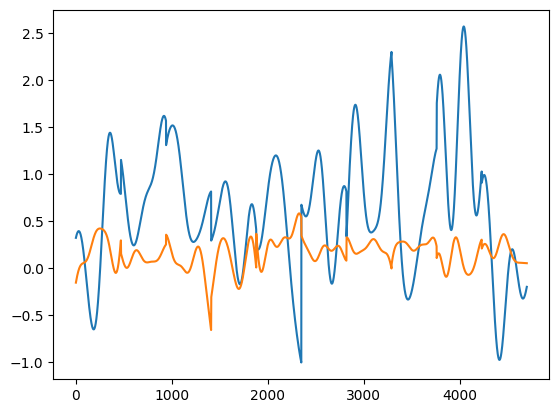

In [ ]:
#insertion 23, first movement, time_window = np.array([-0.1, 0.0])  # 100 ms before the event
plt.plot(session.z)

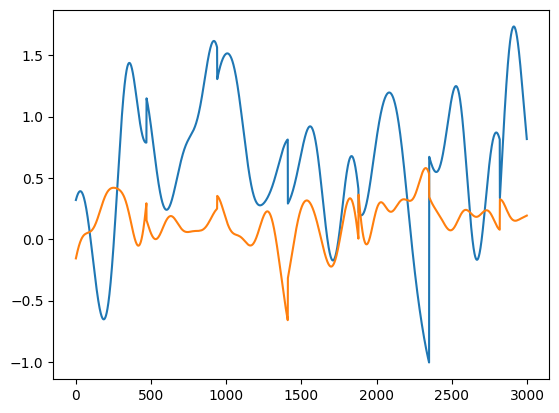

In [ ]:
plt.plot(session.z[:3000])

In [ ]:
#latent variable = 2
# %% Build the model
kernel = RBF(scale=1., lengthscale=100 * dt)  # RBF kernel
# key = jax.random.PRNGKey(0)
# kernel = RFF(key, 50, 1, scale=1., lengthscale=100 * dt)
session, params = vi.fit(session, n_factors=2, kernel=kernel, seed=random_seed, max_iter=50)
# `fit` requires the target `session`, the number of factors `n_factors`, and the `kernel` function.
# `kernel` is a kernel function or a list of them corresponding to the factors.
# RBF kernel is implemented in `gp.kernel`. You may write your own kernels.

Initializing
Initialized
EM Iteration 1, 	Loss = 17.2830, 	M step: 0.90s, 	E step: 4.16s
EM Iteration 2, 	Loss = 17.2529, 	M step: 0.75s, 	E step: 3.99s
EM Iteration 3, 	Loss = 17.2387, 	M step: 1.26s, 	E step: 2.92s
EM Iteration 4, 	Loss = 17.2278, 	M step: 0.39s, 	E step: 2.09s
EM Iteration 5, 	Loss = 17.2169, 	M step: 0.38s, 	E step: 2.80s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


EM Iteration 6, 	Loss = 17.2027, 	M step: 0.36s, 	E step: 5.60s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning: E: maximum number of iterations reached
  warnings.warn(f'E: maximum number of iterations reached')


EM Iteration 7, 	Loss = 17.1823, 	M step: 0.35s, 	E step: 3.83s
EM Iteration 8, 	Loss = 17.1556, 	M step: 0.36s, 	E step: 3.92s
EM Iteration 9, 	Loss = 17.1278, 	M step: 0.36s, 	E step: 5.76s
EM Iteration 10, 	Loss = 17.1042, 	M step: 0.39s, 	E step: 3.78s
EM Iteration 11, 	Loss = 17.0865, 	M step: 0.42s, 	E step: 3.68s
EM Iteration 12, 	Loss = 17.0732, 	M step: 0.39s, 	E step: 5.97s
EM Iteration 13, 	Loss = 17.0605, 	M step: 0.40s, 	E step: 4.25s
EM Iteration 14, 	Loss = 17.0500, 	M step: 0.44s, 	E step: 4.31s
EM Iteration 15, 	Loss = 17.0398, 	M step: 0.38s, 	E step: 5.80s
EM Iteration 16, 	Loss = 17.0310, 	M step: 0.37s, 	E step: 3.80s
EM Iteration 17, 	Loss = 17.0227, 	M step: 0.34s, 	E step: 3.85s
EM Iteration 18, 	Loss = 17.0154, 	M step: 0.39s, 	E step: 5.78s
EM Iteration 19, 	Loss = 17.0078, 	M step: 0.38s, 	E step: 3.85s
EM Iteration 20, 	Loss = 17.0009, 	M step: 0.35s, 	E step: 3.98s
EM Iteration 21, 	Loss = 16.9948, 	M step: 0.54s, 	E step: 5.61s
EM Iteration 22, 	Loss = 16.

/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning: E: maximum number of iterations reached
  warnings.warn(f'E: maximum number of iterations reached')


Trial 2, 	Loss = 21.5694
Trial 3, 	Loss = 18.6182


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


Trial 4, 	Loss = 15.8644
Trial 5, 	Loss = 21.1773
Trial 6, 	Loss = 20.3478
Trial 7, 	Loss = 24.3121
Trial 8, 	Loss = 21.0613
Trial 9, 	Loss = 8.4209
Trial 10, 	Loss = 10.8932
Finished


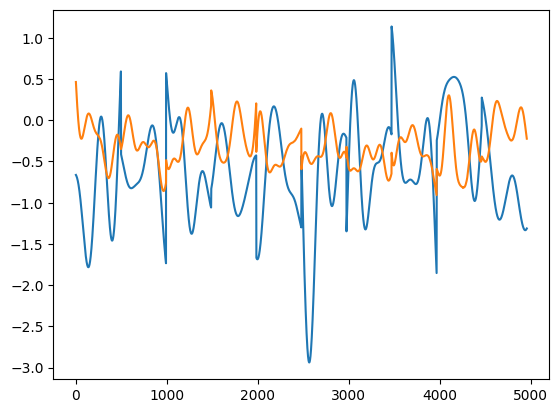

In [ ]:
#insertion 23, stimulus, time_window = np.array([-0.5, 1.5])  # 100 ms before the event
plt.plot(session.z)

In [ ]:
#latent variable = 2
# %% Build the model
kernel = RBF(scale=1., lengthscale=100 * dt)  # RBF kernel
# key = jax.random.PRNGKey(0)
# kernel = RFF(key, 50, 1, scale=1., lengthscale=100 * dt)
session, params = vi.fit(session, n_factors=2, kernel=kernel, seed=random_seed, max_iter=50)
# `fit` requires the target `session`, the number of factors `n_factors`, and the `kernel` function.
# `kernel` is a kernel function or a list of them corresponding to the factors.
# RBF kernel is implemented in `gp.kernel`. You may write your own kernels.

Initializing
Initialized
EM Iteration 1, 	Loss = 12.2563, 	M step: 1.69s, 	E step: 5.22s
EM Iteration 2, 	Loss = 12.2404, 	M step: 0.74s, 	E step: 2.38s
EM Iteration 3, 	Loss = 12.2314, 	M step: 0.44s, 	E step: 1.68s
EM Iteration 4, 	Loss = 12.2192, 	M step: 0.36s, 	E step: 2.56s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


EM Iteration 5, 	Loss = 12.1964, 	M step: 0.37s, 	E step: 3.44s


/usr/local/lib/python3.10/dist-packages/vlgpax/vi.py:170: UserWarning: E: maximum number of iterations reached
  warnings.warn(f'E: maximum number of iterations reached')


EM Iteration 6, 	Loss = 12.1580, 	M step: 0.36s, 	E step: 5.63s
EM Iteration 7, 	Loss = 12.1228, 	M step: 0.33s, 	E step: 3.94s
EM Iteration 8, 	Loss = 12.0993, 	M step: 0.39s, 	E step: 3.94s
EM Iteration 9, 	Loss = 12.0845, 	M step: 0.39s, 	E step: 5.85s
EM Iteration 10, 	Loss = 12.0715, 	M step: 0.38s, 	E step: 3.80s
EM Iteration 11, 	Loss = 12.0611, 	M step: 0.37s, 	E step: 3.64s
EM Iteration 12, 	Loss = 12.0519, 	M step: 0.37s, 	E step: 5.50s
EM Iteration 13, 	Loss = 12.0437, 	M step: 0.37s, 	E step: 3.90s
EM Iteration 14, 	Loss = 12.0372, 	M step: 0.35s, 	E step: 3.70s
EM Iteration 15, 	Loss = 12.0314, 	M step: 0.39s, 	E step: 5.53s
EM Iteration 16, 	Loss = 12.0258, 	M step: 0.37s, 	E step: 3.68s
EM Iteration 17, 	Loss = 12.0207, 	M step: 0.44s, 	E step: 3.36s
EM Iteration 18, 	Loss = 12.0164, 	M step: 0.39s, 	E step: 4.96s
EM Iteration 19, 	Loss = 12.0121, 	M step: 0.59s, 	E step: 4.35s
EM Iteration 20, 	Loss = 12.0082, 	M step: 0.38s, 	E step: 3.83s
EM Iteration 21, 	Loss = 12.0

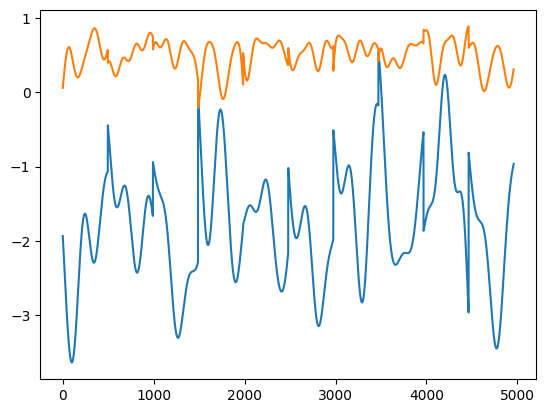

In [ ]:
#insertion 23, stimulus, time_window = np.array([0, 1])  # 100 ms after the event
# adjusting the time window to be smaller, from the stimulus happens 1s after stimulus, the trajectories seems separate and better than before
plt.plot(session.z)

In [ ]:
#discon